# 텍스트 분류 개요

텍스트 분류란 자연어 처리 기술을 활용해 글의 정보를 추출해서 문제에 맞게 사람이 정한 범주(Class)로 분류하는 문제다. 이번에는 실제로 데이터셋을 가지고 텍스트 분류를 할 예정이다. 한글 텍스트 분류와 영어 텍스트 분류의 경우 자연어 처리 기술을 통해 언어를 처리하는 과정이 각 언어의 특성에 따라 다르기 때문에 따로 진행한다.

이번에 할 감정 분석은 주어진 글을 분석한 후 감정을 긍정 혹은 부정으로 예측하는 모델이다. 좀 더 구체적으로는 영화 리뷰 데이터를 여러 모델을 사용해 학습한 뒤 해당 모델을 통해 새로운 리뷰가 긍정적인 리뷰인지 부정적인 리뷰인지 예측한다. 단순히 긍정 부정으로 나눌수도 있지만 경우에 따라서는 중립이나 좀 더 세분화 할 수도 있다.

# 영어 텍스트 분류 문제 소개

#### 데이터 이름 : Bag of Words Meets Bags of Popcorn

워드 팝콘은 인터넷 영화 데이터베이스(IMDB)에서 나온 영화 평점 데이터를 활용한 캐글 문제다. 영화 평점 데이터이므로 각 데이터는 영화 리뷰 텍스트와 평점에 따른 감정 값(긍정/부정)으로 구성되어 있다.

#### 방법
 - 1. 데이터 불러오기 및 정제되지 않은 데이터 전처리
 - 2. 데이터 분석하는 과정
 - 3. 실제 문제를 해결하기 위해 알고리즘 모델링

# 데이터 분석 및 전처리

 - 캐글 데이터 불러오기
 - EDA(탐색적 자료 분석)
 - 데이터 정제
  - HTML 및 문장 부호 제거
  - 불용어 제거
  - 단어 최대 길이 설정
  - 단어 패딩
  - 벡터 표상화
 - 모델링

In [1]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 데이터 불러오기 및 분석
# 현재 사용할 데이터는 탭(\t)으로 구분되어 있으므로 delimeter 인자에 "\t"을 설정한다.
# 각 데이터에 항목명(Header)이 포함되어 있으므로 header 인자에 "0"을 설정한다.
# 그리고 쌍따옴표를 무시하기 위해 quoting 인자에 "3"을 설정한다.
train_data = pd.read_csv("./data/Bag of Words Meets Bags of Popcorn/labeledTrainData.tsv", header = 0, delimiter = "\t", quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


데이터는 "id", "sentiment", "review"로 구분되어 있으며, 각 리뷰("review")에 대한 감정("sentiment")이 긍정(1) 혹은 부정(0)으로 기록되어 있다.

#### 분석 분석
 - 1. 데이터 크기
 - 2. 데이터의 개수
 - 3. 각 리뷰의 문자 길이 분포
 - 4. 많이 사용된 단어
 - 5. 긍정, 부정 데이터의 분포
 - 6. 각 리뷰의 단어 개수 분포
 - 7. 특수문자 및 대문자 , 소문자 비율

In [2]:
# 데이터 크기 확인
# os 라이브러리를 사용해 해당 경로의 파일 목록을 가져오고 해당 디렉터리 안에 압축파일이 아닌 원본 파일만 가져와서 데이터 크기를 출력한다.

print("파일 크기 : ")
for file in os.listdir("./data/Bag of Words Meets Bags of Popcorn/") : 
    if "tsv" in file and "zip" not in file : 
        print(file.ljust(30) + str(round(os.path.getsize("./data/Bag of Words Meets Bags of Popcorn/" + file) / 1000000, 2)) + "MB")

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [3]:
# 데이터의 개수
print("전체 학습 데이터의 개수 : {}" .format(len(train_data)))

전체 학습 데이터의 개수 : 25000


In [4]:
# 각 리뷰의 문자 길이 분포
# 각 리뷰의 길이가 담겨있다.
train_length = train_data["review"].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

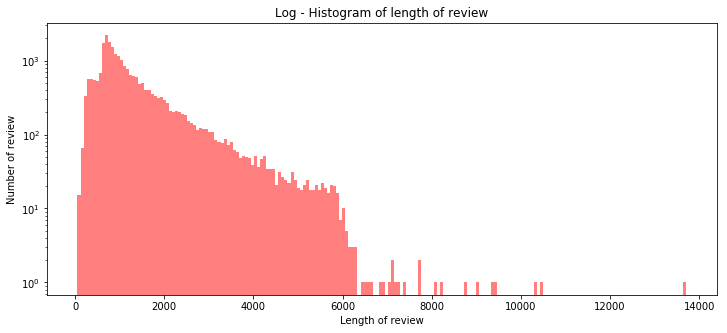

리뷰 길이 최댓값 : 13710
리뷰 길이 최솟값 : 54
리뷰 길이 평균 : 1329.71
리뷰 길이 표준편차 : 1005.22
리뷰 길이 제1사분위 : 705.0
리뷰 길이 제3사분위 : 1619.0


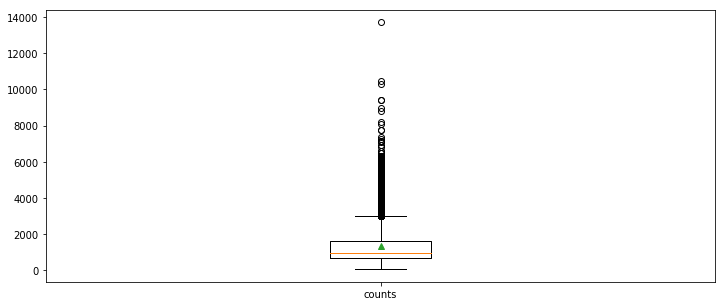

In [5]:
# 각 리뷰의 문자 길이 분포 (히스토그램)
plt.figure(figsize = (12,5))                                                        # 그래프의 크기
plt.hist(train_length, bins = 200, alpha = 0.5, color = "r", label = "word")        # 그래프 생성
plt.yscale("log", nonposy = "clip")                                                 # Y축 스케일 결정
plt.title("Log - Histogram of length of review")                                    # 그래프 제목
plt.xlabel("Length of review")                                                      # X축 제목
plt.ylabel("Number of review")                                                      # Y축 제목 
plt.show()

# 리뷰 길이의 통계값
print("리뷰 길이 최댓값 : {}" .format(np.max(train_length)))
print("리뷰 길이 최솟값 : {}" .format(np.min(train_length)))
print("리뷰 길이 평균 : {:.2f}" .format(np.mean(train_length)))
print("리뷰 길이 표준편차 : {:.2f}" .format(np.std(train_length)))
print("리뷰 길이 제1사분위 : {}" .format(np.percentile(train_length, 25)))
print("리뷰 길이 제3사분위 : {}" .format(np.percentile(train_length, 75)))

# 각 리뷰의 문자 길이 분포 (박스플랏)
plt.figure(figsize = (12,5))
plt.boxplot(train_length, labels=["counts"], showmeans = True)
plt.show()

히스토그램을 살펴보면 대부분의 데이터는 6,000 이하이며, 또 그 중 대부분은 2,000 이하이다. 일부 데이터의 경우 이상값으로 10,000 이상의 값을 가지고 있다. 박스플랏을 살펴보면 대부분의 길이가 2,000 이하로 평균 1,500 이하인데 길이가 4,000 이상인 이상값도 많이 분포되어 있다.

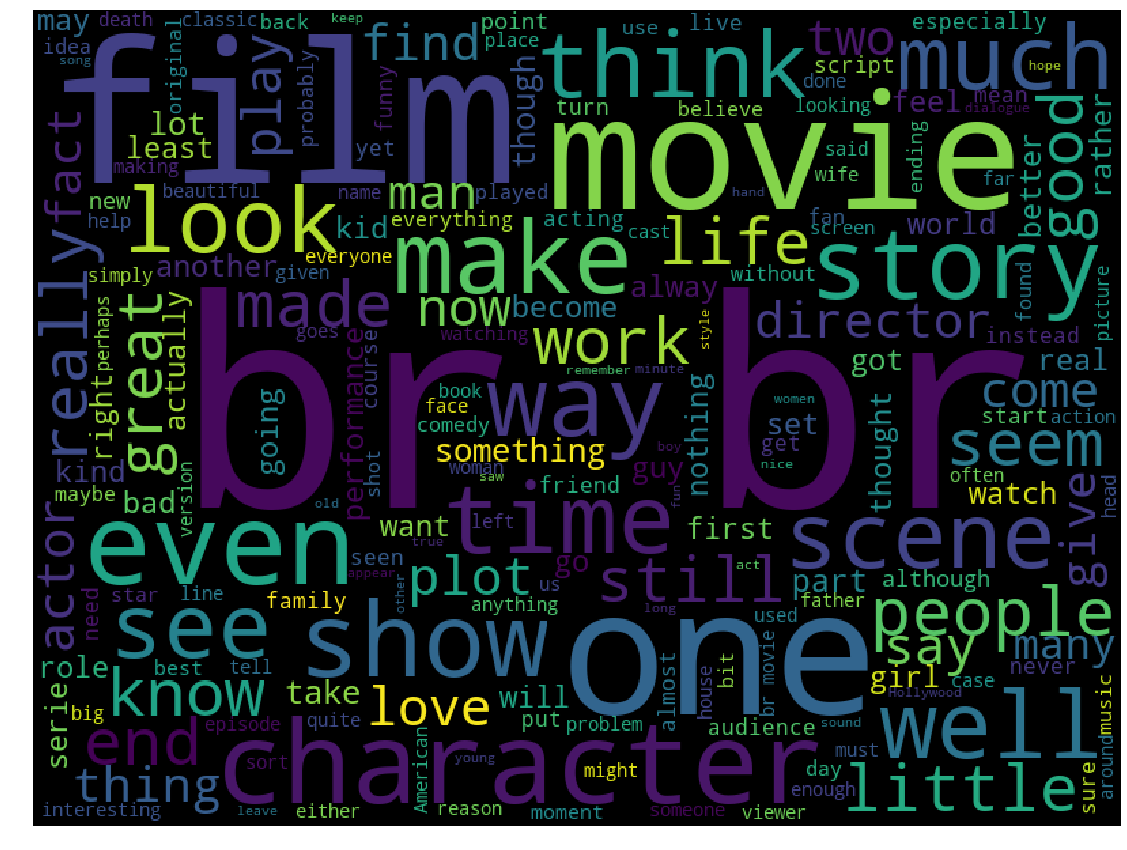

In [6]:
# 워드 클라우드
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600).generate("".join(train_data["review"]))
plt.figure(figsize = (20,15))
plt.imshow(cloud)
plt.axis("off")
plt.show()

워드 클라우드를 통해 그린 그림을 살펴보면 데이터에서 가장 많이 사용된 단어는 br이라는 단어다. br은 HTML 태그 중 하나로, 이후 전처리 작업에서 제거해야할 대상이다.

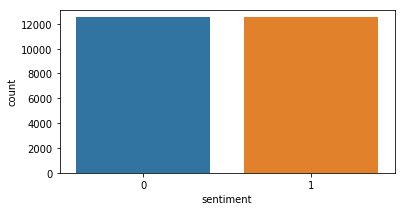

긍정 리뷰 개수 : 12500
부정 리뷰 개수 : 12500


In [7]:
# 긍정과 부정 데이터의 개수
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6,3)
sns.countplot(train_data["sentiment"])
plt.show()

# 개수 확인
print("긍정 리뷰 개수 : {}" .format(train_data["sentiment"].value_counts()[1]))
print("부정 리뷰 개수 : {}" .format(train_data["sentiment"].value_counts()[0]))

In [8]:
# 각 리뷰를 단어 기준으로 나눠서 각 리뷰당 단어의 개수를 확인
# 단어는 띄어쓰기 기준으로 하나의 단어라 생각하고 개수를 계산한다.
train_word_counts = train_data["review"].apply(lambda x : len(x.split(" ")))

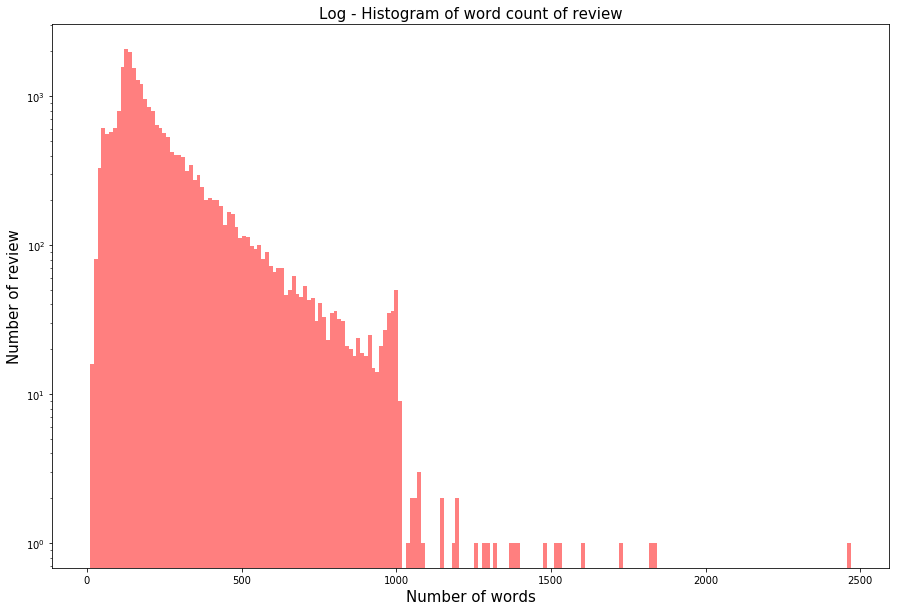

리뷰 단어 개수 최댓값 : 2470
리뷰 단어 개수 최솟값 : 10
리뷰 단어 개수 평균 : 233.79
리뷰 단어 개수 표준편차 : 173.74
리뷰 단어 개수 중간값 : 174.00
리뷰 단어 개수 제1사분위 : 127.0
리뷰 단어 개수 제3사분위 : 284.0


In [9]:
# 각 리뷰의 문자 길이 분포 (히스토그램)
plt.figure(figsize = (15,10))                                                         # 그래프의 크기
plt.hist(train_word_counts, bins = 200, alpha = 0.5, color = "r", label = "word")     # 그래프 생성
plt.yscale("log", nonposy = "clip")                                                   # Y축 스케일 결정
plt.title("Log - Histogram of word count of review", fontsize = 15)                   # 그래프 제목
plt.xlabel("Number of words", fontsize = 15)                                          # X축 제목
plt.ylabel("Number of review", fontsize = 15)                                         # Y축 제목 
plt.show()

# 리뷰 길이의 통계값
print("리뷰 단어 개수 최댓값 : {}" .format(np.max(train_word_counts)))
print("리뷰 단어 개수 최솟값 : {}" .format(np.min(train_word_counts)))
print("리뷰 단어 개수 평균 : {:.2f}" .format(np.mean(train_word_counts)))
print("리뷰 단어 개수 표준편차 : {:.2f}" .format(np.std(train_word_counts)))
print("리뷰 단어 개수 중간값 : {:.2f}" .format(np.median(train_word_counts)))
print("리뷰 단어 개수 제1사분위 : {}" .format(np.percentile(train_word_counts, 25)))
print("리뷰 단어 개수 제3사분위 : {}" .format(np.percentile(train_word_counts, 75)))

대부분의 리뷰가 1,000개 미만의 단어를 가지고 있고, 대부분 200개 정도의 단어를 가지고 있다.

In [10]:
# 각 리뷰에 대해 구두점과 대소문자 비율
qmarks = np.mean(train_data["review"].apply(lambda x : "?" in x))                                       # 물음표가 구두점으로 쓰인 리뷰
fullstop = np.mean(train_data["review"].apply(lambda x : "." in x))                                     # 마침표가 구두점으로 쓰인 리뷰
capital_first = np.mean(train_data["review"].apply(lambda x : x[0].isupper()))                          # 첫글짜가 대문자로 쓰인 리뷰
capitals = np.mean(train_data["review"].apply(lambda x : max([y.isupper() for y in x])))                # 대문자가 있는 리뷰
numbers = np.mean(train_data["review"].apply(lambda x : max([y.isdigit() for y in x])))                 # 숫자가 있는 리뷰
print("물음표가 있는 질문 : {:.2f}%" .format(qmarks * 100))
print("마침표가 있는 질문 : {:.2f}%" .format(fullstop * 100))
print("첫 글자가 대문자인 질문 : {:.2f}%" .format(capital_first * 100))
print("대문자가 있는 질문 : {:.2f}%" .format(capitals * 100))
print("숫자가 있는 질문 : {:.2f}%" .format(numbers * 100))

물음표가 있는 질문 : 29.55%
마침표가 있는 질문 : 99.69%
첫 글자가 대문자인 질문 : 0.00%
대문자가 있는 질문 : 99.59%
숫자가 있는 질문 : 56.66%


결과를 보면 대부분 마침표를 포함하고 있고, 대문자도 대부분 사용하고 있다. 따라서 전처리 과정에서 대문자의 경우 모두 소문자로 바꾸고 특수 문자의 경우 제거한다. 

In [11]:
# 데이터 전처리
import re
import pandas
import numpy
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

# 첫번째 리뷰 데이터 확인해보기
print("첫번째 리뷰 데이터 : {}" .format(train_data["review"][0]))

첫번째 리뷰 데이터 : "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when i

In [12]:
# Beautiful Soup를 이용해서 HTML 태그를 제거하고, re.sub를 이용해 특수문자를 제거
review = train_data['review'][0]                                  # 리뷰 중 하나를 가져온다.
review_text = BeautifulSoup(review,"html5lib").get_text()         # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text )              # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다.
print("HTML 태그와 특수문자를 제외한 후의 리뷰 : {}" .format(review_text))

HTML 태그와 특수문자를 제외한 후의 리뷰 :  With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally 

결과를 보면 HTML 태그와 특수문자가 모두 제거된 것을 확인할 수 있다. 다음으로 진행할 과정은 불용어(stopword)를 삭제하는 것이다. 불용어는 문장에서 자주 출현하나 전체적인 의미에 큰 영향을 주지 않는 단어를 말한다. 예를 들어에서는 조사, 관사 등과 같은 어휘가 있다. 데이터에 따라 불용어를 제거하는 것은 장담점이 있다. 경우에 따라 불용어가 포함된 데이터를 모델링하는 데 있어 노이즈를 줄 수 있는 요인이 될 수 있어 불용어를 제거하는 것이 좋을 수 있다. 그렇지만 데이터가 많고 문장 구문에 대한 전체적인 패턴을 모델링하고자 한다면 이는 역효과를 줄 수도 있다. 그렇지만 데이터가 많고 문장 구문에 대한 전체적인 패턴을 모델링하고자 한다면 이는 역효과를 줄 수도 있다. 감정 분석에는 일반적으로 불용어가 감정 판단에 영향을 주지 않는다고 갖정하고 불용어는 제거한다.

불용어를 제거하려면 따로 정의한 불용어 사전을 이용해야 한다. 사용자가 직접 정의할 수도 있지만 고려해야 하는 경우가 너무 많아서 보통 라이브러리에서 일반적으로 정의해놓은 불용어 사전을 이용한다. 이번에는 NLTK에서 제공하는 불용어 사전을 이용한다. 그 전에 NLTK에서 재공하는 불용어 사전은 모두 소문자 단어로 구성되어 있기 때문에 불용어 제거를 위해 모든 단어를 우선 소문자로 바꾼 후 불용어를 제거한다.

In [13]:
# 영어 불용어 set을 만든다.
stop_words = set(stopwords.words("english"))

# 모든 단어를 소문자로 바꾼다.
review_text = review_text.lower()

# 소문자로 변환 후 단어마다 나눠서 단어 리스트로 만든다.
words = review_text.split()

# 불용어를 제거한 리스트를 만든다.
words = [w for w in words if not w in stop_words]

# 결과 확인
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

하나의 문자열이었던 리뷰가 단어 리스트로 바뀌었다. 이를 모델에 적용하기 위해서는 다시 하나의 문자열로 합쳐야 한다.

In [14]:
# 단어 리스트를 하나의 문자열로 합치기
clean_review = " ".join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

이러한 과정을 전체 25,000개의 데이터셋에 적용해야하지만 일일히 적용할 수는 없으므로 모든 전처리 과정을 하나의 함수로 정의하고 적용한다.

In [15]:
def preprocessing(review, remove_stopwords = False) :
    
    # 1.HTML 태그 제거
    review_text = BeautifulSoup(review, "html5lib").get_text()
    
    # 2.영어가 아닌 특수문자를 공백으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)            
    
    # 3.대문자를 소문자고 바꾸고 공백 단위로 텍스트를 나눠서 리스트로 만든다.
    words = review_text.lower().split()
    
    # 4.불용어 제거
    if remove_stopwords : 
        
        # 영어 불용어 사전 불러오기
        stops = set(stopwords.words("english"))
        
        # 불용어가 아닌 단어로 이뤄진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        
        # 단어 리스트를 공백을 넣어서 하나의 글로 합치기
        clean_review = " ".join(words)
        
    # 5. 불용어 제거하지 않는 경우 단어 리스트를 공백을 넣어서 하나의 글로 합치기
    else : 
        clean_review = " ".join(words)
        
    return clean_review

In [16]:
# 전체 데이터에 대한 전처리
clean_train_reviews = []

for review in train_data["review"] : 
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))
    
# 전처리한 데이터의 첫 번째 데이터를 출력
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

이제 두 가지 전처리 과정이 남았는데, 우선 전처리한 데이터엣 각 단어를 인덱스로 벡터화해야 한다. 모델에 따라 입력값의 길이가 동일해야 하기 때문에 일정 길이로 자르고 부족한 부분은 특정값으로 채우는 패딩 과정을 진행해야 한다. 그러나 모델에 따라 각 리뷰가 단어들의 인덱스로 구성된 벡티가 아닌 텍스트로 구성되야 하는 경우도 있다. 따라서 전처리한 데이터를 데이터프레임으로 만들고 이후 전처리 과정이 모두 끝난 후 전처리한 데이터를 저장할 때 함께 저장한다.

In [17]:
clean_train_df = pd.DataFrame({"review" : clean_train_reviews, "sentiment" : train_data["sentiment"]})
clean_train_df.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [18]:
# 토크나이즈 모듈을 생성한 후 정제된 데이터에 적용하고 인덱스로 구성된 벡터로 변환한다.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

# 이렇게 하면 각 리뷰가 텍스트가 아닌 인덱스의 벡터로 구성될 것이다.
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [19]:
# 결과를 보면 텍스트였던 리뷰가 각 단어의 인덱스로 바뀌었다.
# 전체 데이터가 인덱스로 구성되어 있을 대 각 인덱스가 어떤 단어를 의미하는지 확인하기 위해 단어사전이 필요하다.
word_vocab = tokenizer.word_index
# print(word_vocab)

In [20]:
# 전체 단어 개수 확인
print("전체 단어 개수 : ", len(word_vocab))

전체 단어 개수 :  74065


In [21]:
# 단어 사전과 전체 단어 개수는 이후 모델에서 사용되기 때문에 새롭게 딕셔너리에 저장한다.
data_configs = {}

data_configs["vocab"] = word_vocab
data_configs["vocab_size"] = len(word_vocab) + 1

In [22]:
# 현재 각 데이터는 서로 길이가 다르므로 이 길이를 하나로 통일해야 모델에 적용할 수 있다.
# 특정 길이를 최대로 지정하고 그보다 길면 자르고, 그보다 짧으면 0 값으로 패딩하는 작업을 진행한다.
MAX_SEQUENCE_LENGTH = 174
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
print("Train 데이터 구조 :", train_inputs.shape)

Train 데이터 구조 : (25000, 174)


pad_sequence 함수는 인자로 패딩을 적용할 데이터, 최대 길이값, 0 값을 데이터 앞에 넣을지 뒤에 넣을지 여부를 결정한다. 길이를 174로 지정한 이유는 단어 개수의 중간값이기 떄문이다. 보통 평균이 아닌 중간값을 사용하는 경우가 많은데 평균값은 일부 이상값에 영향을 많이 받을 수 있기 때문이다.

In [23]:
# 학습시 라벨, 즉 정답을 나타내는 값을 넘파이 배열로 저장한다.
# 넘파이 배열로 저장하는 이유는 전처리한 데이터를 저장할 때 넘파이 형태로 저장하기 때문이다.
train_labels = np.array(train_data["sentiment"])
print("Shape of label tensor : ", train_labels.shape)

Shape of label tensor :  (25000,)


In [24]:
# 전처리가 끝난 데이터는 이후 모델링 과정에서 사용하기 위해 저장해야 한다.
# 총 4개의 데이터를 저장한다.
# 정제된 텍스트 데이터 / 벡터화한 데이터 / 정답 라벨 / 데이터 정보(단어 사전, 전체 단어 개수)
# 텍스트 데이터의 경우 CSV파일로 저장하고, 벡터화한 데이터와 정답 라벨의 경우 넘파이 파일로 저장한다.
# 데이터의 정보의 경우 딕셔너리 형태이므로 JSON 파일로 저장ㅎ나다.

In [25]:
# Test 데이터를 전처리할 때 한가지 중요한 점은 토크나이저를 통해 인덱스 벡터로 만들 때 토크나이징 객체로 새롭게 만드는 것이 아니라,
# 기존에 Train 데이터에 적용한 토크나이저 객체를 사용해야한다는 것이다.
# 만약 새롭게 만들 경우 학습 데이터와 평가 데이터에 대한 각 단어들의 인덱슥 달라저 모델에 정상적으로 적용할 수 없기 때문이다.

In [26]:
DATA_IN_PATH = "./data/"
TRAIN_INPUT_DATA = "train_input.npy"
TRAIN_LABEL_DATA = "train_label.npy"
TRAIN_CLEAN_DATA = "train_clean.csv"
DATA_CONFIGS = "data_configs.json"

import os

# 저장하는 디렉터리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH) : 
    os.markdirs(DATA_IN_PATH)
    
# 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [27]:
# 이제 Test 데이터에 대한 전처리도 같은 방법으로 진행하고 저장한다.
# Test 데이터는 라벨값과 데이터 정보는 필요가 없다.
# 그러나, 추가로 각 리부 데이터에 대해 리뷰에 대한 "id" 값을 저장해야 한다.

# Test 데이터 로딩
test_data = pd.read_csv("./data/Bag of Words Meets Bags of Popcorn/TestData.tsv", header=0, delimiter="\t", quoting=3)

# Test 데이터 전처리
clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))

clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# 파일 저장
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

# 모델링 소개

## 회귀 모델
딥러닝 모델을 시작하기에 앞서 먼저 간단한 모델을 만들어 보자. 이번 장에서 만들 모델은 로지스틱 회귀 모델이다. 주로 이항 분류를 하기 위해 사용되며 분류 문제에서 사용할 수 있는 가장 간단한 모델이다. 로지스틱 회귀는 선형결합을 통해 나온 결과를 토대로 예측하게 된다.

## 선형 회귀 모델
선형 회귀 모델은 종속변수와 독립변수 간의 상관관계를 모델링하는 방법이다. 간단히 말하면 하나의 선형 방정식으로 표현해 예측할 데이터를 분류하는 모델이다.
$$y = w_1x_1 + w_2x_2 + \cdot\cdot\cdot + b$$

## 로지스틱 회귀 모델
로지스틱 모델은 선형 모델의 결과값에 로지스틱 함수를 적용해 0 ~ 1 사이의 값을 갖게 해서 확률로 표현한다. 이렇게 나온 결과를 통해 1에 가까우면 정답이 1이라 예측하고, 0에 가까우면 정답을 0으로 예측한다.

##### 입력값은 단어를 word2vec을 통한 단어 임베딩 벡터로 만드는 방법과 tf-idf를 통해 임베딩 벡터로 만드는 방법 두 가지를 모두 사용한다.

## TF-IDF를 활용한 모델 구현

In [28]:
# 데이터 불러오기
train_data = pd.read_csv("./data/train_clean.csv")

# 리뷰와 감정 값을 리스트로 각각 저장
reviews = list(train_data["review"])
sentiments = list(train_data["sentiment"])

# TF-IDF 벡터화
# min_df : 설정한 값보다 특정 토큰의 df 값이 더 적게 나오면 벡터화 과정에서 제거한다.
# analyzer : 분석하기 위한 기준 단위 ("word" = 단어 하나를 단위, "char" = 문자 하나를 단위)
# sublinear_tf : 문서의 단어 빈도수에 대한 스무딩 여부 설정
# ngram_range : 빈도의 기본 단위를 어느 범위의 n-gram으로 설정할 것인지 여부
# max_features : 각 벡터의 최대 길이, 특징의 길이를 설정
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf = True, ngram_range = (1,3), max_features = 5000)
X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

# 시드 고정 및 Validation 데이터 비율
RANDOM_SEED = 42
TEST_SPLIT = 0.2

# Train과 eval로 데이터 분리
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# 모델 선언 및 학습
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(class_weight = "balanced")
lgs.fit(X_train, y_train)

# 검증 데이터로 성능 평가
print("Accuracy : %f" %(lgs.score(X_eval,y_eval)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 0.859600


In [29]:
# 데이터 Kaggle에 제출하기

# test 데이터 불러오기
test_data = pd.read_csv("./data/test_clean.csv")

# train 데이터에 맞춰저 있는 토크나이즈를 통해 test 데이터에 적용하기
testDataVecs = vectorizer.transform(test_data["review"])

# test 데이터 예측하기
test_predicted = lgs.predict(testDataVecs)

# 결과값 저장하기
DATA_OUT_PATH = "./dataout/"
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
answer_dataset = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False, quoting=3)

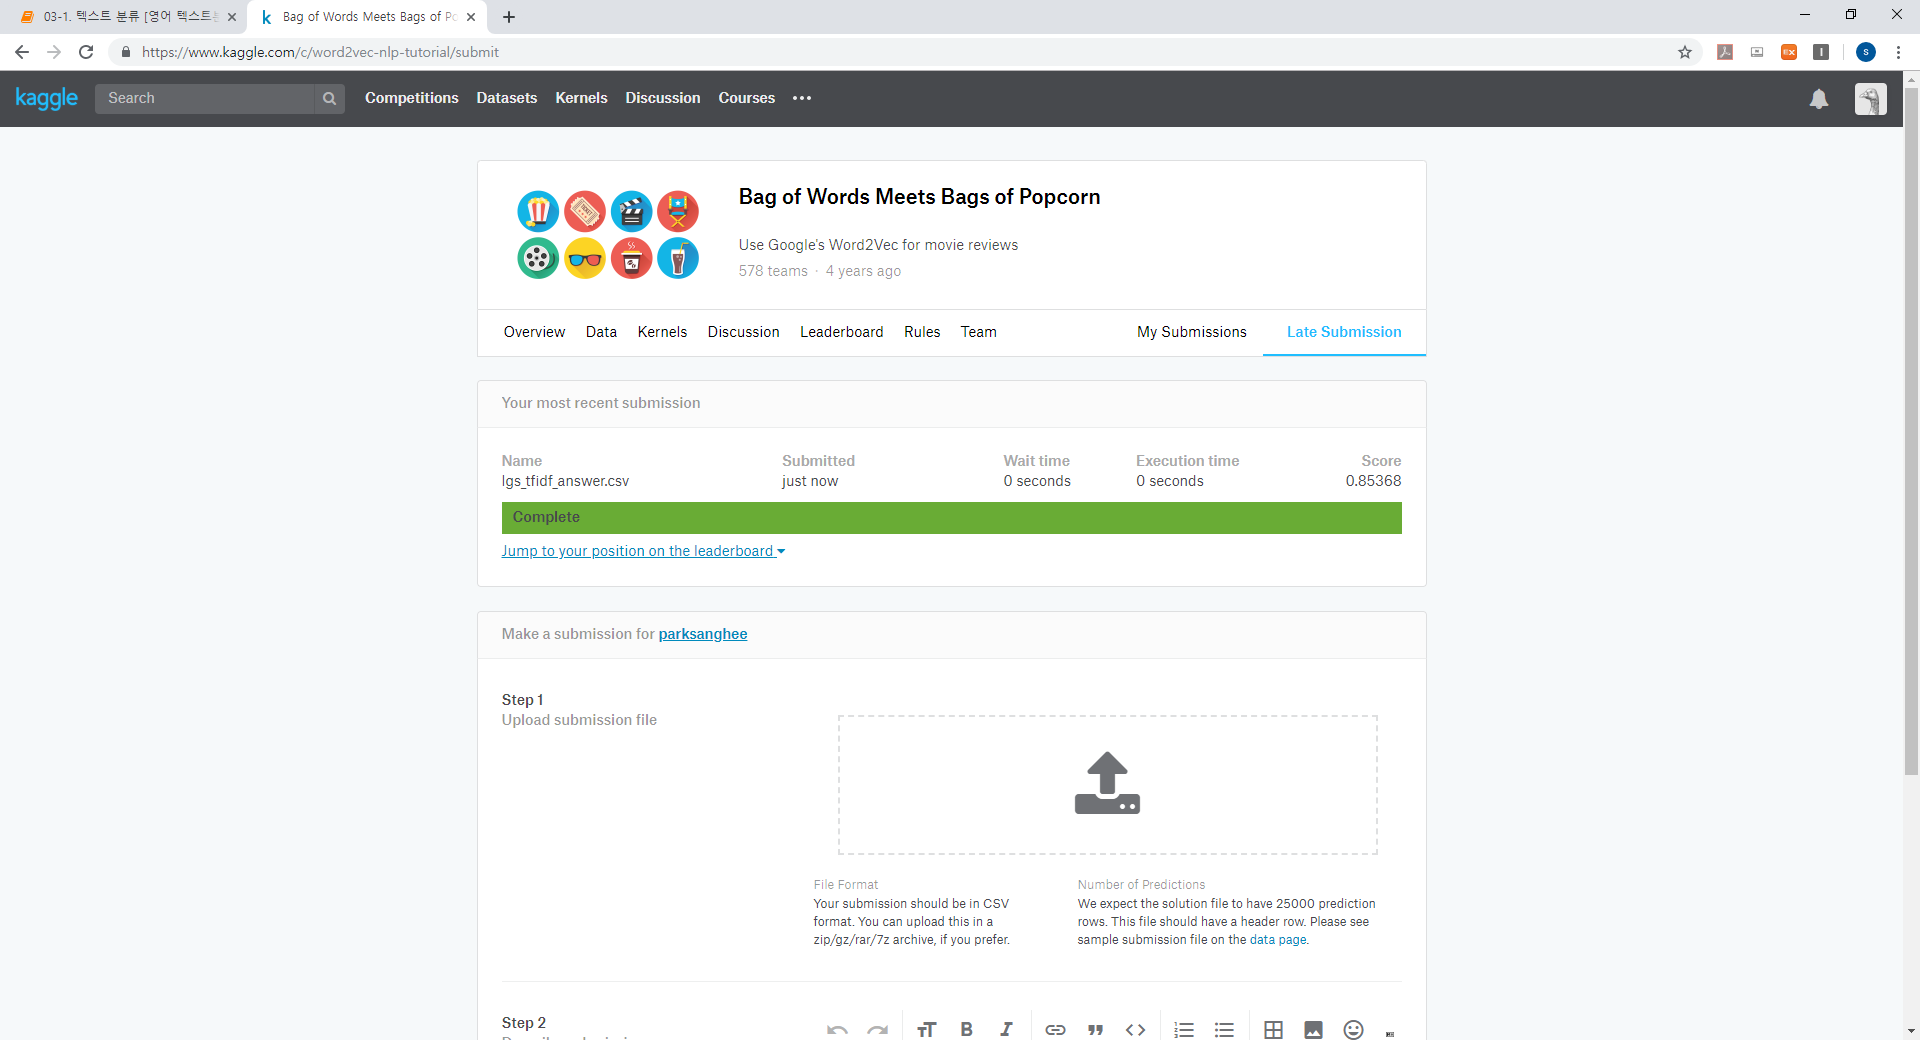

In [30]:
from IPython.display import Image
Image("Image/aaa.png")

# word2vec을 활용한 모델 구현
각 단어에 대해 word2vec으로 벡터화한다. word2vec의 경우 단어로 표현된 리스트를 입력값으로 넣어야 하기 때문에 전처리 넘파이 배열을 사용하지 않는다. 따라서 전처리된 텍스트 데이터를 불러온 후 각 단어들의 리스트로 나눠야 한다.

In [31]:
# 데이터 불러오기
train_data = pd.read_csv("./data/train_clean.csv")

# 리뷰와 감정 값을 리스트로 각각 저장
reviews = list(train_data["review"])
sentiments = list(train_data["sentiment"])

# 
sentences = []
for review in reviews : 
    sentences.append(review.split())

# word2vec에 필요한 하이퍼 파라미터
num_features = 300      # 워드 벡터 특징값 수
min_word_count = 40     # 단어에 대한 최소 빈도 수
num_workers = 4         # 프로세스 개수
context = 10            # 컨텍스트 윈도우 크기
downsampling = 1e-3     # 다운 샘플링 비율

# word2vec을 학습하는 과정에서 진행 상황을 보기 위해 logging을 통해 확인한다.
import logging
logging.basicConfig(format = "%(asctime)s : %(levelname)s : %(message)s", level = logging.INFO)

# word2vec 모델 선언
from gensim.models import word2vec
print("Training model.....")
model = word2vec.Word2Vec(sentences, workers = num_workers, size = num_features, min_count = min_word_count,
                                     window = context, sample = downsampling)

2019-08-06 20:51:38,591 : INFO : 'pattern' package not found; tag filters are not available for English
2019-08-06 20:51:38,599 : INFO : collecting all words and their counts
2019-08-06 20:51:38,600 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model.....


2019-08-06 20:51:38,824 : INFO : PROGRESS: at sentence #10000, processed 1205223 words, keeping 51374 word types
2019-08-06 20:51:39,028 : INFO : PROGRESS: at sentence #20000, processed 2396605 words, keeping 67660 word types
2019-08-06 20:51:39,128 : INFO : collected 74065 word types from a corpus of 2988089 raw words and 25000 sentences
2019-08-06 20:51:39,128 : INFO : Loading a fresh vocabulary
2019-08-06 20:51:39,167 : INFO : effective_min_count=40 retains 8160 unique words (11% of original 74065, drops 65905)
2019-08-06 20:51:39,167 : INFO : effective_min_count=40 leaves 2627273 word corpus (87% of original 2988089, drops 360816)
2019-08-06 20:51:39,191 : INFO : deleting the raw counts dictionary of 74065 items
2019-08-06 20:51:39,196 : INFO : sample=0.001 downsamples 30 most-common words
2019-08-06 20:51:39,197 : INFO : downsampling leaves estimated 2494384 word corpus (94.9% of prior 2627273)
2019-08-06 20:51:39,221 : INFO : estimated required memory for 8160 words and 300 dimen

In [32]:
# 모델 저장하기
model_name = "300features_40minwords_10context"
model.save(model_name)

2019-08-06 20:51:52,423 : INFO : saving Word2Vec object under 300features_40minwords_10context, separately None
2019-08-06 20:51:52,424 : INFO : not storing attribute vectors_norm
2019-08-06 20:51:52,427 : INFO : not storing attribute cum_table
2019-08-06 20:51:52,817 : INFO : saved 300features_40minwords_10context


만들어진 word2vec 모델을 활용해 선형 회귀 모델을 학습한다. 우선 학습을 하기 위해서는 하나의 리뷰를 같은 형태의 입력값으로 만들어야 한다. 지금은 word2vec 모델에서 각 단어가 벡터로 표현되어 있다. 그리고 리뷰마다 단어의 개수가 모두 다르기 때문에 입력값을 하나의 형태로 만들어야 한다. 

가장 단순한 방법으로는 문장에 있는 모든 단어의 벡터값에 대해서 평균을 내서 리뷰 하나당 하나의 벡터로 만드는 방법이 있다. 아래처럼 하나의 리뷰에 대해 전체 단어의 평균값을 계산하는 함수를 구현한다.

In [33]:
# words : 단어의 모음인 하나의 리뷰가 들어간다.
# model : 모델을 넣는 곳이며, 우리가 학습한 word2vec 모델이 들어간다.
# num_features : word2vec으로 임베딩할 때 정했던 벡터의 차원 수를 뜻한다.


def get_features(words, model, num_features) : 
    # 출력 벡터 초기화
    feature_vector = np.zeros((num_features), dtype=np.float32)
    
    num_words = 0
    
    # 어휘사전 준비
    index2word_set = set(model.wv.index2word)
    
    for w in words : 
        if w in index2word_set : 
            num_words = num_words + 1
            # 사전에 해당하는 단어에 대해 단어 벡터를 더함
            feature_vector = np.add(feature_vector, model[w])
    
    # 문장의 단어 수 만큼 나누어 단어 벡터의 평균값을 문장 벡터로 함
    feature_vector = np.divide(feature_vector, num_words)
    
    return feature_vector

하나의 벡터를 만드는 과정에서 속도를 빠르게 하기 위해 np.zeros를 사용해서 미리 모두 0의 값을 가지는 벡터를 만든다. 그리고 문장의 단어가 해당 모델 단어사전에 속하는지 보기 위해 model.wv.index2word를 set객체로 생성해서 index2word_set 변수에 할당한다. 다음 반복문을 통해 리뷰를 구성하는 단어에 대해 임베딩된 벡터가 있는 단어 벡터의 합을 구한다. 마지막으로 사용한 단어의 전체 개수로 나누어서 평균 벡터의 값을 구한다.

In [34]:
# 전체 리뷰에 대해 각 리뷰의 평균 벡터를 구하는 함수를 정의한다.

def get_dataset(reviews, model, num_features) : 
    dataset = list()
    
    for s in reviews : 
        dataset.append(get_features(s, model, num_features))
        
    reviewFeatrueVecs = np.stack(dataset)
    
    return reviewFeatrueVecs

속도 향상을 위해 전체 리뷰에 대한 평균 벡터를 담을 0으로 채워진 넘파이 배열을 미리 만든다. 배열은 2차원으로 만드는데 배열의 행에는 각 문장에 대한 길이를 입력하면 되고 열에는 평균 벡터의 차원 수, 즉 크기를 입력하면 된다.

In [35]:
# 전체 데이터에 대한 입력값 만들기
train_data_vecs = get_dataset(sentences, model, num_features)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [36]:
# 학습과 검증 데이터셋 분리
from sklearn.model_selection import train_test_split
import numpy as np

X = train_data_vecs
y = np.array(sentiments)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [37]:
# 모델 선언 및 하습
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = "balanced")
lgs.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [38]:
# 검증 데이터셋을 이용한 성능 평가

predicted = lgs.predict(X_eval)
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_eval, (lgs.predict_proba(X_eval)[:, 1]))
auc = metrics.auc(fpr, tpr)

print("------------")
print("Accuracy: %f" % lgs.score(X_eval, y_eval))  #checking the accuracy
print("Precision: %f" % metrics.precision_score(y_eval, predicted))
print("Recall: %f" % metrics.recall_score(y_eval, predicted))
print("F1-Score: %f" % metrics.f1_score(y_eval, predicted))
print("AUC: %f" % auc)

------------
Accuracy: 0.862200
Precision: 0.856586
Recall: 0.872568
F1-Score: 0.864503
AUC: 0.934159


In [39]:
# 데이터 Kaggle에 제출하기

# test 데이터 불러오기
test_data = pd.read_csv("./data/test_clean.csv")

# 리뷰값을 리스트로 만들기
test_review = list(test_data["review"])

# 각 리뷰에 따라 단어의 리스트 만들기
test_sentences = []
for review in test_review : 
    test_sentences.append(review.split())

# 기존에 학습시킨 word2vec으로 각 리뷰에 대한 특징값 만들기
test_data_vecs = get_dataset(test_sentences, model, num_features)
    
# test 데이터 예측하기
test_predicted = lgs.predict(test_data_vecs)

# 결과 데이터 저장하기
ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id': ids, 'sentiment': test_predicted})
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_w2v_answer.csv', index=False, quoting=3)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


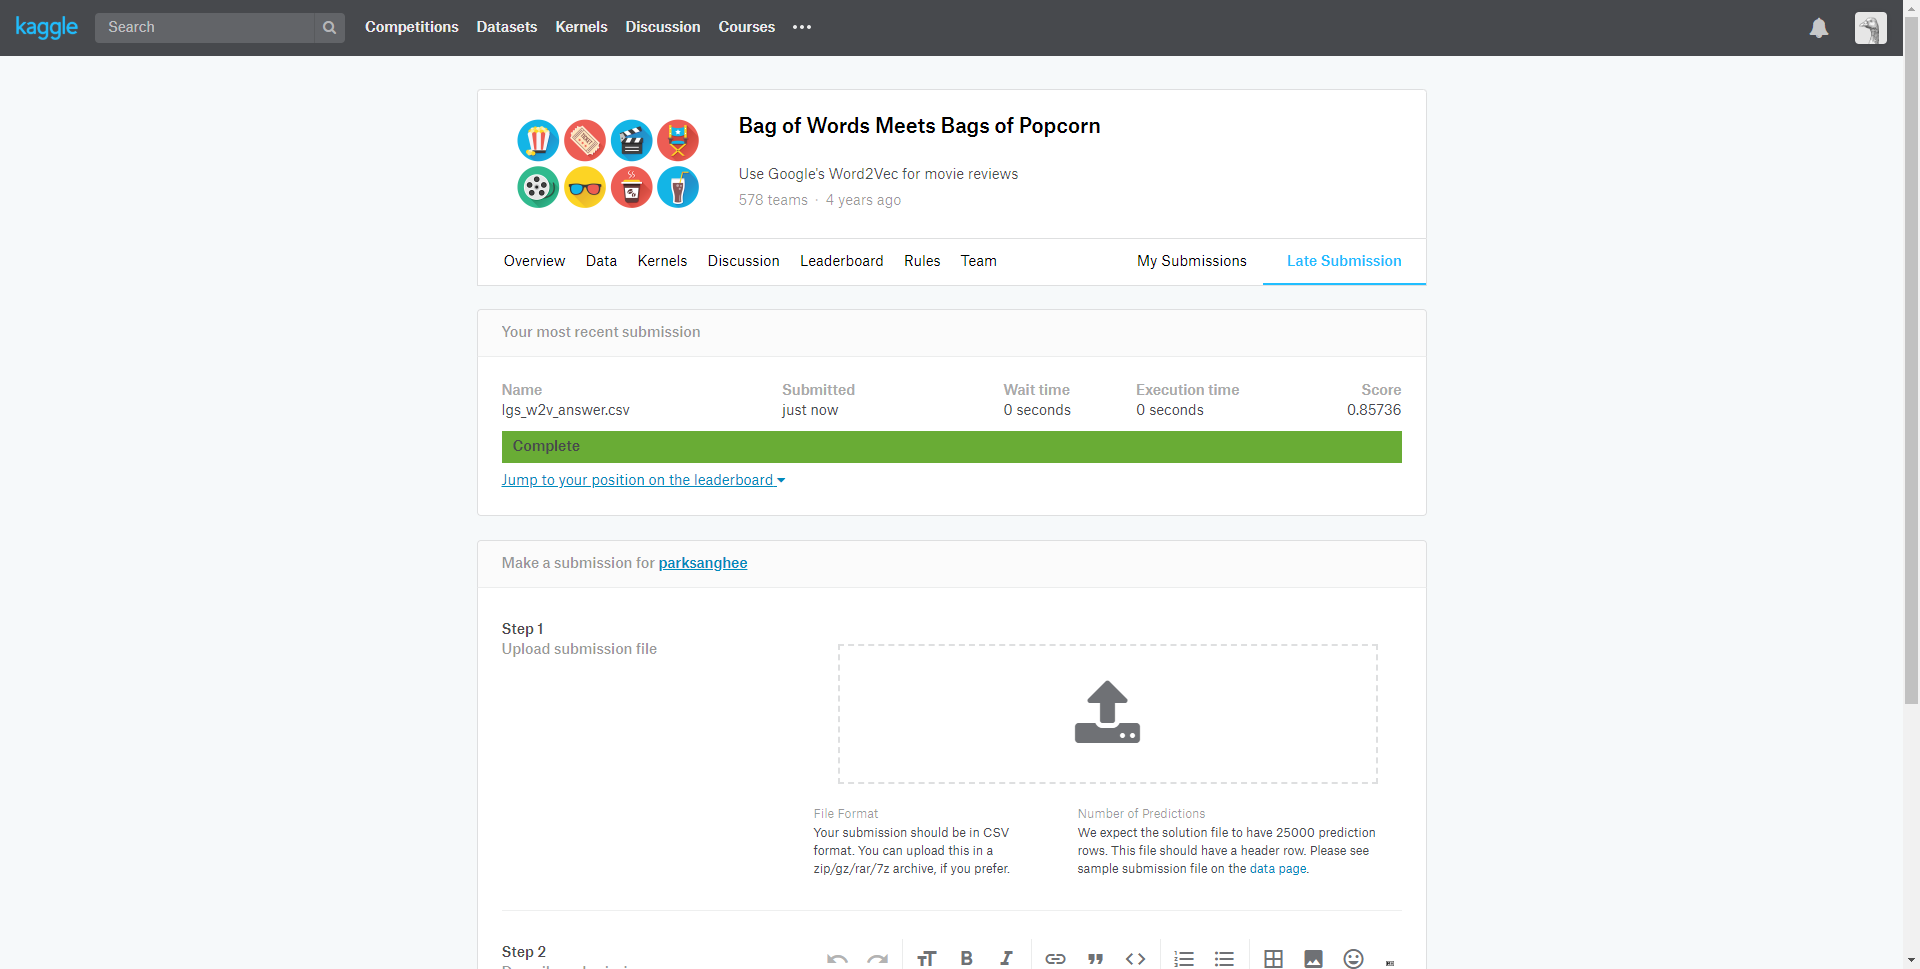

In [40]:
from IPython.display import Image
Image("Image/bbb.png")

# Random Forest 분류 모델
랜덤 포레스트에서는 여러 개의 의사결정 트리의 결과값을 평균낸 것을 결과로 사용한다. 랜덤 포레스트를 통해 분류 혹은 회귀를 할 수 있다. 의사결정 트리란 자료구조중 하나인 트리 구조와 같은 형태로 이뤄진 알고리즘이다. 트리 구조의 형태에서 각 노드는 하나의 질문이 된다. 질문에 다라 다음 노드가 달라지며, 몇개의 질문이 끝난 후에 결과가 나오는 형태이다. 랜덤 포레스트는 이와 같은 의사결정 트리 구조가 모여있는 형태라고 생각하면 된다.각 트리에서 구한 결과를 종합해서 최종 결과를 도출한다. 즉, 많은 트리를 함께 사용함으로써 정확도가 높아진다.

In [41]:
# CountVectorizer를 활용한 벡터화
# 모델을 구현하기에 앞서 모델에 사용할 입력값을 정해야 한다. 랜덤 포레스트에서는 CountVectorizer를 사용해 모델의 입력값을 만든다.
import pandas as pd

# 데이터 경로 지정
DATA_IN_PATH = "./data/"
TRAIN_CLEAN_DATA = "train_clean.csv"

# review 가져 오기
train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
reviews = list(train_data["review"])
y = np.array(train_data["sentiment"])

# CountVectorizer 적용하기
# 분석 단위를 하나의 단어로 지정 : analyzer = "word"
# 각 벡터의 최대 길이 지정 : max_features = 5000
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", max_features = 5000)
train_data_features = vectorizer.fit_transform(reviews)

In [42]:
# 결과
# (25000x5000) 크기의 행렬로 구성되어 있다.
# 이는 25,000개의 데이터가 각각 5,000개의 특징값을 가지는 벡터로 표현되어 있다는 것을 의미한다.
train_data_features

<25000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1975048 stored elements in Compressed Sparse Row format>

In [43]:
# 데이터 분리
TEST_SIZE =0.2
RANDOM_SEED = 42

train_input, eval_input, train_label, eval_label = train_test_split(train_data_features, y, test_size = TEST_SIZE, random_state = RANDOM_SEED)

In [44]:
# 모델 구현 및 학습
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기에 100개의 의사결정 트리를 사용한다.
forest = RandomForestClassifier(n_estimators = 100)

# 단어 묶음을 벡터화한 데이터와 정답 데이터를 가지고 학습한다.
forest.fit(train_input, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
# 검증 데이터셋으로 평가하기
print("Accuracy : {:.4f}". format(forest.score(eval_input, eval_label)))

Accuracy : 0.8476


약 84%의 정확도가 나왔는데, 앙상블 모델임에도 불구하고 앞서 사용한 간단한 모델보다 좋지 않는 성능을 보여준다. 이는 모델의 문제일수도 있고 데이터에서 특징을 추출하는 방법의 문제일수도 있다. 즉 모델을 바꾸지 않더라도 TF-IDF나 word2vec을 사용해서 입력값을 만든다면 성능이 높아질 수도 있다.

In [59]:
# Kaggle에 데이터 제출

# Test 데이터 불러오기
test_data = pd.read_csv("./data/test_clean.csv")
test_reviews = list(test_data["review"])
ids = list(test_data["id"])

# Test 데이터 전처리
test_data_features = vectorizer.transform(test_reviews)

# 파일 경로 만들기
if not os.path.exists(DATA_OUT_PATH) : 
    os.makedirs(DATA_OUT_PATH)
    
# 예측 결과 생성
result = forest.predict(test_data_features)

# 결과 데이터프레임으로 저장
output = pd.DataFrame(data = {"id" : ids, "sentiment" : result})

# 결과 csv 파일로 저장
output.to_csv(DATA_OUT_PATH + "rf_CountVec_answer.csv", index = False, quoting = 3)

# 순환 신경망 분류 모델(RNN)
순환 신경망은 언어 모델에서 많이 쓰이는 딥러닝 모델 중 하나다. 주로 순서가 있는 데이터, 즉 문장 데이터를 입력해서 문장 흐름에서 패턴을 찾아 분류하게 한다. 앞선 모델들과 달리 이미 주어진 단어 특징 벡터를 활용해 모델을 학습하지 않고 텍스트 정보를 입력해서 문장에 대한 특징 정보를 추출한다.

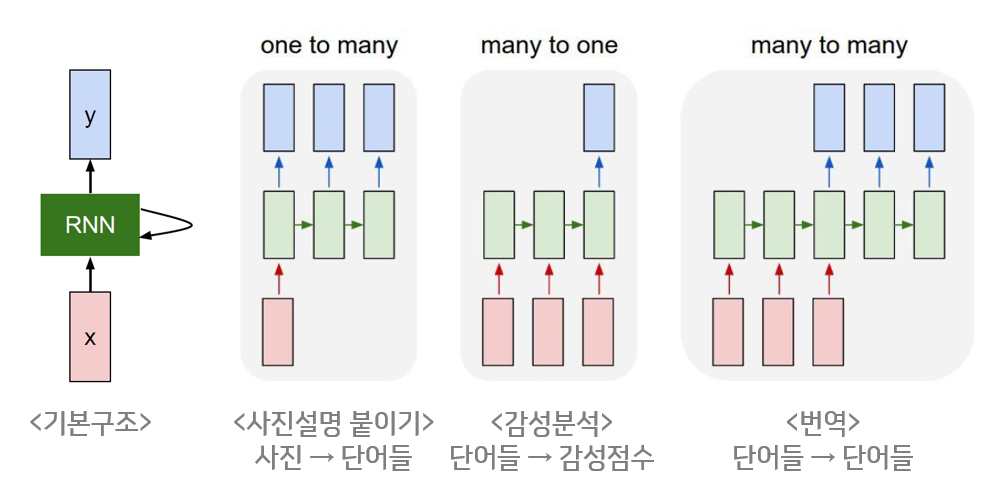

In [47]:
from IPython.display import Image
Image("Image/asdf.png")

순환 신경망(RNN)은 현재 정보는 이전 정보가 점층적으로 쌓이면서 정보를 표현할 수 있는 모델이다. 따라서 시간에 의존적인 또는 순차적인 데이터에 대한 문제에 활용된다.
###### "아버지 가방에 들어가신다."
이 모델에서 우선 "아버지"를 입력하고 그 다음에 나올 단어를 예측하고, 그 다음 "가방에"를 입력하자 그러면 그 다음에 올 단어는 단순히 "가방에"라는 정보만 가지고 예측하는 것이 아니라 앞서 입력한 "아버지"라는 정보를 함께 이용해서 다음 단어를 예측하게 된다. 여기서 현재 정보인 "가방에"를 입력 상태(Input State)라고 부르고 이전 정보를 은닉 상태(Hidden State)라고 부른다. 순환신경망은 이 두 상태 정보를 활용해서 순서가 있는 데이터에 대해 예측 모델링을 가능하게 한다.

영화 평점 예측을 위한 신경망 모델은 앞서 설명한 예시와는 조금 다르다. 먼저 입력 문장을 순차적으로 입력만 하고 마지막으로 입력한 시점에 출력 정보를 뽑아 영화 평점을 예측한다. 매 시간 스텝에 따라 입력되는 입력 정보는 은닉 상태(Hidden State)을 통해 다음 시간 스텝으로 전달할 수 있게 한다. 마지막 시간 스텝에 나온 은닉 상태는 문장 전체 정보가 담긴 정보로써 이 정보를 활용해 영화 평점을 예측할 수 있도록 로지스틱 회귀 또는 이진 분류를 하면 된다.

In [77]:
# 라이브러리 호출
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import json

########################################################################################################################

# 데이터 경로 및 이름 지정
DATA_IN_PATH = './data/'
DATA_OUT_PATH = './dataout/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

########################################################################################################################

# 데이터 불러오기
input_data = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
label_data = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
prepro_configs = None

with open(DATA_IN_PATH + DATA_CONFIGS, 'r') as f:
    prepro_configs = json.load(f)
    
########################################################################################################################

# 데이터 분리하기
TEST_SPLIT = 0.1
RANDOM_SEED = 13371447
train_input, test_input, train_label, test_label = train_test_split(input_data, label_data, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

########################################################################################################################

# 데이터 입력 함수
BATCH_SIZE = 16
NUM_EPOCHS = 3

def mapping_fn(X, Y):
    inputs, labels = {'x': X}, Y
    return inputs, labels

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((train_input, train_label))
    dataset = dataset.shuffle(buffer_size=50000)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.repeat(count=NUM_EPOCHS)
    dataset = dataset.map(mapping_fn)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((test_input, test_label))
    dataset = dataset.map(mapping_fn)
    dataset = dataset.batch(BATCH_SIZE * 2)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

########################################################################################################################

# 하이퍼 파라미터 지정
VOCAB_SIZE = prepro_configs['vocab_size']+1
WORD_EMBEDDING_DIM = 100
HIDDEN_STATE_DIM = 150
DENSE_FEATURE_DIM = 150
learning_rate = 0.001

########################################################################################################################

# RNN 구현
def model_fn(features, labels, mode):
    TRAIN = mode == tf.estimator.ModeKeys.TRAIN
    EVAL = mode == tf.estimator.ModeKeys.EVAL
    PREDICT = mode == tf.estimator.ModeKeys.PREDICT
    
    # 먼저 모델에서 배치 데이터를 받게 되면 단어 인덱스로 구성된 시퀀스 형태로 입력이 들어온다.
    # 모델의 입력 인자인 features는 파이썬 딕셔너리 형태로 구성되어 있다.
    
    # 모델에 들어온 입력 데이터는 보통 임베딩 층을 거친다. embedding_layer가 그 역할을 수행한다.
    embedding_layer = tf.keras.layers.Embedding(VOCAB_SIZE, WORD_EMBEDDING_DIM)(features['x'])
    embedding_layer = tf.keras.layers.Dropout(0.2)(embedding_layer)
    
    # 임베딩을 거쳐 나온 데이터는 순환 신경망 층을 거쳐 문장의 의미 벡터를 출력한다.
    # 여기서는 간단한 심층 순환 신경망 모델은 LSTM 모델을 통해 구현한다.
    # 순환 신경망을 구현하기 위해 텐서플로에서는 RNNCell이란 객체를 활용한다.
    # LSTM으로 순환 신경망을 구현하기 위해 tf.nn.rnn_cell_LSTMCell 객체를 생성한다.
    # 이 객체는 하나의 LSTM Cell을 의미하므로 해당 Cell 객체를 여러 개 생성해서 하나의 리스트로 만들어 준다.
    rnn_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in [HIDDEN_STATE_DIM, HIDDEN_STATE_DIM]]
    
    # 여러 LSTMCell을 쌓게 되면 이를 하나의 MultiRNN으로 묶어야, 즉 래핑(wrapping)해야 한다.
    multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(rnn_layers)

    # tf.nn.rnn_cell.MultiRNNCell을 생성함으로써 스택 구조의 LSTM 신경망을 구현할 수 있다.
    # 단순히 RNNCell 만으로 구성해 모델 연산 그래프를 만들 수 있다. RNNCell 객체는 시퀀스 한 스텝에 대한 연산만 가능하다.
    # 따라서 여서 스텝에 대한 연산을 하기 위해서는 for문을 활용해 연산할 수 있게 구현해야 한다.
    # 텐서플로우는 tf.nn.dynamic_rnn 함수를 이용해 for문 없이 자동으로 순환 신경망을 만들어 주는 역할을 한다.
    
    # dynamic_rnn 함수에 필요한 입력 인자는 2개다. 첫번째는 순환 신경망 객체인 MultiRNNCell 객체다.
    # 두번째는 입력값이다. 그리고 dtype 인자를 통해 출력값의 데이터 타입을 설정해 줄 수 있다.
    
    # 네트워크와 임베딩 벡터와 연산하기 위해 dynamic_rnn 함수를 선언한다.
    outputs, state = tf.nn.dynamic_rnn(cell=multi_rnn_cell,inputs=embedding_layer, dtype=tf.float32)
    
    # 기준 확률 20%로 히든 레이어에 드롭아웃을 실행한다.
    outputs = tf.keras.layers.Dropout(0.2)(outputs)
    
    # Dense에 적용시키는 입력값은 LSTM 신경망의 마지막 출력값을 넣어준다. 출력값에[:,-1,:]로 마지막 값만 뽑아낸후 Dense에 적용한다.
    # 활성화 함수는 하이퍼블릭 탄젠트 함수를 사용한다.
    hidden_layer = tf.keras.layers.Dense(DENSE_FEATURE_DIM, activation=tf.nn.tanh)(outputs[:,-1,:])
    hidden_layer = tf.keras.layers.Dropout(0.2)(hidden_layer)
    
    # 마지막으로 감정이 긍정인지 부정인지 판단할 수 있도록 출력값을 하나로 만들어야 한다.
    # 보통 선형 변환을 통해 입력 벡터에 대한 차원 수를 바꾼다.
    # 여기서는 tf.keras.layer.Dense함수가 이 같은 역할을 한다.
    logits = tf.keras.layers.Dense(1)(hidden_layer)
    logits = tf.squeeze(logits, axis=-1)
    
    sigmoid_logits = tf.nn.sigmoid(logits)
    
    if PREDICT:
        # 모델 성능을 어느 정도 평가하고 나면 Test 데이터에 대해 예측을 해야한다.
        # 우선 모델 출력값에 대해 0 ~ 1사이의 값으로 정의하기 위해 tf.nn.sigmoid 함수를 활용한다.
        predictions = {'sentiment': sigmoid_logits}
        
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # 모델 예측 loss 값은 모델에서 구한 logits 변수화 정답인 label 변수를 가지고 구한다.
    # logits 변수의 경우 아직 로지스틱 함수를 통해 0 ~ 1 사이의 값으로 스케일을 맞춰두지 않았다.
    # 물론 dense 층에서 activation 인자를 tf.nn.sigmoid 로 설정해 둘 수 있지만,
    # tf.losses.sigmoid_cross_entropy 함수를 활용해 손실값을 구할 수 있다.
    loss = tf.losses.sigmoid_cross_entropy(labels, logits)
    
    if EVAL:
        # 모델 학습을 마치면 모델 성능이 대략 어느 정도인지 확인할 필요가 있다.
        # 여기서는 감정 예측값이 정답 라벨과 얼마나 일치하는지 정확도를 본다.
        # 정확도는 tf.metrics_accuracy를 통해 나타낼 수 있다.
        # 이 결과값을 tf.estimator.EstimatroSpec의 eval_metric_ops 인자로 입력하면 평가 결과값을 확인할 수 있다.
        accuracy = tf.metrics.accuracy(labels, tf.round(sigmoid_logits))
        eval_metric_ops = {'acc': accuracy}

        return tf.estimator.EstimatorSpec(mode, loss=loss, eval_metric_ops=eval_metric_ops)
    
    if TRAIN:
        # 파라미터 최적화를 하고자 경사도 하강법을 진행한다.
        # 여기서는 경사도 하강법 중 하나인 아담 옵티마이저를 활용한다.
        # 아담 옵티마이저 인자로 학습률 값을 넣는다.
        # tf.train_AdamOptimizer.minimize 함수를 선언할 때 전체 학습에 대한 글로벌 스텝 값을 넣어야한다.
        # train.get_global_step() 을 선언하면 현재 학습 글로벌 스텝을 얻을 수 있다.
        global_step = tf.train.get_global_step()
        train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step)

            # 보통 직접 모델 함수를 구현하게 되면 tf.estimator.EstimatorSpec 객체를 생성해서 반환하게 한다.
        # 이 객체는 현재 함수가 어느 모드에서 실행되고 있는지 확인한다.
        # 그리고 각 모드에 따라 필요한 입력 인자가 다르다.
        # 학습을 하는 경우에는 EstimatorSpec에서 학습 연산과 손실값이 필요하다. 앞서 구현한 train_op와 loss 변수를 입력한다.
        # mode는 앞서 모델 함수의 입력 인자값을 그대로 받으면 된다.
        return tf.estimator.EstimatorSpec(mode=mode, train_op=train_op, loss=loss)

In [79]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

est = tf.estimator.Estimator(model_fn=model_fn, model_dir=DATA_OUT_PATH + 'checkpoint/rnn')

INFO:tensorflow:Using default config.


2019-08-06 23:26:47,778 : INFO : Using default config.


INFO:tensorflow:Using config: {'_model_dir': './dataout/checkpoint/rnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002D747485128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


2019-08-06 23:26:47,780 : INFO : Using config: {'_model_dir': './dataout/checkpoint/rnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002D747485128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [80]:
os.environ["CUDA_VISIBLE_DEVICES"]="4"
est.train(train_input_fn)

INFO:tensorflow:Calling model_fn.


2019-08-06 23:26:51,335 : INFO : Calling model_fn.


INFO:tensorflow:Done calling model_fn.


2019-08-06 23:26:52,175 : INFO : Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


2019-08-06 23:26:52,178 : INFO : Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


2019-08-06 23:26:53,329 : INFO : Graph was finalized.


INFO:tensorflow:Restoring parameters from ./dataout/checkpoint/rnn\model.ckpt-4221


2019-08-06 23:26:53,356 : INFO : Restoring parameters from ./dataout/checkpoint/rnn\model.ckpt-4221


INFO:tensorflow:Running local_init_op.


2019-08-06 23:26:53,711 : INFO : Running local_init_op.


INFO:tensorflow:Done running local_init_op.


2019-08-06 23:26:53,799 : INFO : Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 4221 into ./dataout/checkpoint/rnn\model.ckpt.


2019-08-06 23:27:01,149 : INFO : Saving checkpoints for 4221 into ./dataout/checkpoint/rnn\model.ckpt.


INFO:tensorflow:loss = 0.705253, step = 4222


2019-08-06 23:27:05,178 : INFO : loss = 0.705253, step = 4222


INFO:tensorflow:global_step/sec: 4.22031


2019-08-06 23:27:28,871 : INFO : global_step/sec: 4.22031


INFO:tensorflow:loss = 0.7610433, step = 4322 (23.696 sec)


2019-08-06 23:27:28,873 : INFO : loss = 0.7610433, step = 4322 (23.696 sec)


INFO:tensorflow:global_step/sec: 4.26217


2019-08-06 23:27:52,334 : INFO : global_step/sec: 4.26217


INFO:tensorflow:loss = 0.6999342, step = 4422 (23.462 sec)


2019-08-06 23:27:52,336 : INFO : loss = 0.6999342, step = 4422 (23.462 sec)


INFO:tensorflow:global_step/sec: 4.2658


2019-08-06 23:28:15,777 : INFO : global_step/sec: 4.2658


INFO:tensorflow:loss = 0.6899816, step = 4522 (23.442 sec)


2019-08-06 23:28:15,778 : INFO : loss = 0.6899816, step = 4522 (23.442 sec)


INFO:tensorflow:global_step/sec: 4.44153


2019-08-06 23:28:38,291 : INFO : global_step/sec: 4.44153


INFO:tensorflow:loss = 0.6772875, step = 4622 (22.515 sec)


2019-08-06 23:28:38,293 : INFO : loss = 0.6772875, step = 4622 (22.515 sec)


INFO:tensorflow:global_step/sec: 4.44173


2019-08-06 23:29:00,804 : INFO : global_step/sec: 4.44173


INFO:tensorflow:loss = 0.7093922, step = 4722 (22.519 sec)


2019-08-06 23:29:00,811 : INFO : loss = 0.7093922, step = 4722 (22.519 sec)


INFO:tensorflow:global_step/sec: 4.35265


2019-08-06 23:29:23,779 : INFO : global_step/sec: 4.35265


INFO:tensorflow:loss = 0.70121026, step = 4822 (22.970 sec)


2019-08-06 23:29:23,781 : INFO : loss = 0.70121026, step = 4822 (22.970 sec)


INFO:tensorflow:global_step/sec: 4.28824


2019-08-06 23:29:47,099 : INFO : global_step/sec: 4.28824


INFO:tensorflow:loss = 0.6960457, step = 4922 (23.320 sec)


2019-08-06 23:29:47,101 : INFO : loss = 0.6960457, step = 4922 (23.320 sec)


INFO:tensorflow:global_step/sec: 4.37143


2019-08-06 23:30:09,974 : INFO : global_step/sec: 4.37143


INFO:tensorflow:loss = 0.69354415, step = 5022 (22.875 sec)


2019-08-06 23:30:09,975 : INFO : loss = 0.69354415, step = 5022 (22.875 sec)


INFO:tensorflow:global_step/sec: 4.44784


2019-08-06 23:30:32,457 : INFO : global_step/sec: 4.44784


INFO:tensorflow:loss = 0.7069788, step = 5122 (22.484 sec)


2019-08-06 23:30:32,459 : INFO : loss = 0.7069788, step = 5122 (22.484 sec)


INFO:tensorflow:global_step/sec: 4.42194


2019-08-06 23:30:55,072 : INFO : global_step/sec: 4.42194


INFO:tensorflow:loss = 0.69848096, step = 5222 (22.614 sec)


2019-08-06 23:30:55,074 : INFO : loss = 0.69848096, step = 5222 (22.614 sec)


INFO:tensorflow:global_step/sec: 4.27289


2019-08-06 23:31:18,475 : INFO : global_step/sec: 4.27289


INFO:tensorflow:loss = 0.69397557, step = 5322 (23.408 sec)


2019-08-06 23:31:18,482 : INFO : loss = 0.69397557, step = 5322 (23.408 sec)


INFO:tensorflow:global_step/sec: 3.88958


2019-08-06 23:31:44,185 : INFO : global_step/sec: 3.88958


INFO:tensorflow:loss = 0.73046565, step = 5422 (25.705 sec)


2019-08-06 23:31:44,187 : INFO : loss = 0.73046565, step = 5422 (25.705 sec)


INFO:tensorflow:global_step/sec: 4.16636


2019-08-06 23:32:08,187 : INFO : global_step/sec: 4.16636


INFO:tensorflow:loss = 0.71183634, step = 5522 (24.002 sec)


2019-08-06 23:32:08,189 : INFO : loss = 0.71183634, step = 5522 (24.002 sec)


INFO:tensorflow:global_step/sec: 4.29411


2019-08-06 23:32:31,474 : INFO : global_step/sec: 4.29411


INFO:tensorflow:loss = 0.6717411, step = 5622 (23.288 sec)


2019-08-06 23:32:31,476 : INFO : loss = 0.6717411, step = 5622 (23.288 sec)


INFO:tensorflow:global_step/sec: 4.2266


2019-08-06 23:32:55,134 : INFO : global_step/sec: 4.2266


INFO:tensorflow:loss = 0.69135803, step = 5722 (23.659 sec)


2019-08-06 23:32:55,135 : INFO : loss = 0.69135803, step = 5722 (23.659 sec)


INFO:tensorflow:global_step/sec: 4.06765


2019-08-06 23:33:19,718 : INFO : global_step/sec: 4.06765


INFO:tensorflow:loss = 0.6933512, step = 5822 (24.594 sec)


2019-08-06 23:33:19,729 : INFO : loss = 0.6933512, step = 5822 (24.594 sec)


INFO:tensorflow:global_step/sec: 3.79514


2019-08-06 23:33:46,068 : INFO : global_step/sec: 3.79514


INFO:tensorflow:loss = 0.6893114, step = 5922 (26.341 sec)


2019-08-06 23:33:46,070 : INFO : loss = 0.6893114, step = 5922 (26.341 sec)


INFO:tensorflow:global_step/sec: 3.94692


2019-08-06 23:34:11,405 : INFO : global_step/sec: 3.94692


INFO:tensorflow:loss = 0.7026038, step = 6022 (25.336 sec)


2019-08-06 23:34:11,406 : INFO : loss = 0.7026038, step = 6022 (25.336 sec)


INFO:tensorflow:global_step/sec: 4.04696


2019-08-06 23:34:36,114 : INFO : global_step/sec: 4.04696


INFO:tensorflow:loss = 0.69910616, step = 6122 (24.710 sec)


2019-08-06 23:34:36,116 : INFO : loss = 0.69910616, step = 6122 (24.710 sec)


INFO:tensorflow:global_step/sec: 3.92437


2019-08-06 23:35:01,596 : INFO : global_step/sec: 3.92437


INFO:tensorflow:loss = 0.6768272, step = 6222 (25.483 sec)


2019-08-06 23:35:01,599 : INFO : loss = 0.6768272, step = 6222 (25.483 sec)


INFO:tensorflow:global_step/sec: 3.96911


2019-08-06 23:35:26,790 : INFO : global_step/sec: 3.96911


INFO:tensorflow:loss = 0.6962423, step = 6322 (25.200 sec)


2019-08-06 23:35:26,798 : INFO : loss = 0.6962423, step = 6322 (25.200 sec)


INFO:tensorflow:global_step/sec: 3.9784


2019-08-06 23:35:51,926 : INFO : global_step/sec: 3.9784


INFO:tensorflow:loss = 0.704182, step = 6422 (25.130 sec)


2019-08-06 23:35:51,928 : INFO : loss = 0.704182, step = 6422 (25.130 sec)


INFO:tensorflow:global_step/sec: 3.91563


2019-08-06 23:36:17,465 : INFO : global_step/sec: 3.91563


INFO:tensorflow:loss = 0.695942, step = 6522 (25.539 sec)


2019-08-06 23:36:17,467 : INFO : loss = 0.695942, step = 6522 (25.539 sec)


INFO:tensorflow:global_step/sec: 3.98187


2019-08-06 23:36:42,578 : INFO : global_step/sec: 3.98187


INFO:tensorflow:loss = 0.6875075, step = 6622 (25.114 sec)


2019-08-06 23:36:42,580 : INFO : loss = 0.6875075, step = 6622 (25.114 sec)


INFO:tensorflow:Saving checkpoints for 6705 into ./dataout/checkpoint/rnn\model.ckpt.


2019-08-06 23:37:04,121 : INFO : Saving checkpoints for 6705 into ./dataout/checkpoint/rnn\model.ckpt.


INFO:tensorflow:global_step/sec: 3.59433


2019-08-06 23:37:10,400 : INFO : global_step/sec: 3.59433


INFO:tensorflow:loss = 0.680002, step = 6722 (27.822 sec)


2019-08-06 23:37:10,402 : INFO : loss = 0.680002, step = 6722 (27.822 sec)


INFO:tensorflow:global_step/sec: 3.98409


2019-08-06 23:37:35,500 : INFO : global_step/sec: 3.98409


INFO:tensorflow:loss = 0.69309914, step = 6822 (25.108 sec)


2019-08-06 23:37:35,510 : INFO : loss = 0.69309914, step = 6822 (25.108 sec)


INFO:tensorflow:global_step/sec: 4.0099


2019-08-06 23:38:00,439 : INFO : global_step/sec: 4.0099


INFO:tensorflow:loss = 0.6916019, step = 6922 (24.930 sec)


2019-08-06 23:38:00,440 : INFO : loss = 0.6916019, step = 6922 (24.930 sec)


INFO:tensorflow:global_step/sec: 4.01167


2019-08-06 23:38:25,365 : INFO : global_step/sec: 4.01167


INFO:tensorflow:loss = 0.74032664, step = 7022 (24.927 sec)


2019-08-06 23:38:25,367 : INFO : loss = 0.74032664, step = 7022 (24.927 sec)


INFO:tensorflow:global_step/sec: 4.016


2019-08-06 23:38:50,266 : INFO : global_step/sec: 4.016


INFO:tensorflow:loss = 0.7077488, step = 7122 (24.900 sec)


2019-08-06 23:38:50,268 : INFO : loss = 0.7077488, step = 7122 (24.900 sec)


INFO:tensorflow:global_step/sec: 3.97477


2019-08-06 23:39:15,425 : INFO : global_step/sec: 3.97477


INFO:tensorflow:loss = 0.71681833, step = 7222 (25.159 sec)


2019-08-06 23:39:15,427 : INFO : loss = 0.71681833, step = 7222 (25.159 sec)


INFO:tensorflow:global_step/sec: 3.9925


2019-08-06 23:39:40,472 : INFO : global_step/sec: 3.9925


INFO:tensorflow:loss = 0.6959389, step = 7322 (25.054 sec)


2019-08-06 23:39:40,480 : INFO : loss = 0.6959389, step = 7322 (25.054 sec)


INFO:tensorflow:global_step/sec: 3.9505


2019-08-06 23:40:05,785 : INFO : global_step/sec: 3.9505


INFO:tensorflow:loss = 0.69708294, step = 7422 (25.306 sec)


2019-08-06 23:40:05,787 : INFO : loss = 0.69708294, step = 7422 (25.306 sec)


INFO:tensorflow:global_step/sec: 3.96001


2019-08-06 23:40:31,037 : INFO : global_step/sec: 3.96001


INFO:tensorflow:loss = 0.62444353, step = 7522 (25.252 sec)


2019-08-06 23:40:31,039 : INFO : loss = 0.62444353, step = 7522 (25.252 sec)


INFO:tensorflow:global_step/sec: 3.94972


2019-08-06 23:40:56,355 : INFO : global_step/sec: 3.94972


INFO:tensorflow:loss = 0.68007076, step = 7622 (25.320 sec)


2019-08-06 23:40:56,359 : INFO : loss = 0.68007076, step = 7622 (25.320 sec)


INFO:tensorflow:global_step/sec: 3.87447


2019-08-06 23:41:22,166 : INFO : global_step/sec: 3.87447


INFO:tensorflow:loss = 0.71344817, step = 7722 (25.809 sec)


2019-08-06 23:41:22,168 : INFO : loss = 0.71344817, step = 7722 (25.809 sec)


INFO:tensorflow:global_step/sec: 3.94614


2019-08-06 23:41:47,507 : INFO : global_step/sec: 3.94614


INFO:tensorflow:loss = 0.6653249, step = 7822 (25.345 sec)


2019-08-06 23:41:47,514 : INFO : loss = 0.6653249, step = 7822 (25.345 sec)


INFO:tensorflow:global_step/sec: 3.99138


2019-08-06 23:42:12,561 : INFO : global_step/sec: 3.99138


INFO:tensorflow:loss = 0.7122016, step = 7922 (25.049 sec)


2019-08-06 23:42:12,563 : INFO : loss = 0.7122016, step = 7922 (25.049 sec)


INFO:tensorflow:global_step/sec: 4.00046


2019-08-06 23:42:37,558 : INFO : global_step/sec: 4.00046


INFO:tensorflow:loss = 0.65449077, step = 8022 (24.997 sec)


2019-08-06 23:42:37,560 : INFO : loss = 0.65449077, step = 8022 (24.997 sec)


INFO:tensorflow:global_step/sec: 3.9995


2019-08-06 23:43:02,561 : INFO : global_step/sec: 3.9995


INFO:tensorflow:loss = 0.42506877, step = 8122 (25.003 sec)


2019-08-06 23:43:02,563 : INFO : loss = 0.42506877, step = 8122 (25.003 sec)


INFO:tensorflow:global_step/sec: 3.98104


2019-08-06 23:43:27,681 : INFO : global_step/sec: 3.98104


INFO:tensorflow:loss = 0.4529438, step = 8222 (25.119 sec)


2019-08-06 23:43:27,682 : INFO : loss = 0.4529438, step = 8222 (25.119 sec)


INFO:tensorflow:global_step/sec: 3.9952


2019-08-06 23:43:52,710 : INFO : global_step/sec: 3.9952


INFO:tensorflow:loss = 0.49037322, step = 8322 (25.037 sec)


2019-08-06 23:43:52,720 : INFO : loss = 0.49037322, step = 8322 (25.037 sec)


INFO:tensorflow:global_step/sec: 3.99266


2019-08-06 23:44:17,756 : INFO : global_step/sec: 3.99266


INFO:tensorflow:loss = 0.20720814, step = 8422 (25.039 sec)


2019-08-06 23:44:17,758 : INFO : loss = 0.20720814, step = 8422 (25.039 sec)


INFO:tensorflow:Saving checkpoints for 8442 into ./dataout/checkpoint/rnn\model.ckpt.


2019-08-06 23:44:22,728 : INFO : Saving checkpoints for 8442 into ./dataout/checkpoint/rnn\model.ckpt.


INFO:tensorflow:Loss for final step: 0.17151923.


2019-08-06 23:44:24,771 : INFO : Loss for final step: 0.17151923.


In [81]:
est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.


2019-08-06 23:52:16,782 : INFO : Calling model_fn.


INFO:tensorflow:Done calling model_fn.


2019-08-06 23:52:19,030 : INFO : Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-08-06-14:52:19


2019-08-06 23:52:19,054 : INFO : Starting evaluation at 2019-08-06-14:52:19


INFO:tensorflow:Graph was finalized.


2019-08-06 23:52:19,146 : INFO : Graph was finalized.


INFO:tensorflow:Restoring parameters from ./dataout/checkpoint/rnn\model.ckpt-8442


2019-08-06 23:52:19,150 : INFO : Restoring parameters from ./dataout/checkpoint/rnn\model.ckpt-8442


INFO:tensorflow:Running local_init_op.


2019-08-06 23:52:19,271 : INFO : Running local_init_op.


INFO:tensorflow:Done running local_init_op.


2019-08-06 23:52:19,294 : INFO : Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-08-06-14:52:25


2019-08-06 23:52:25,101 : INFO : Finished evaluation at 2019-08-06-14:52:25


INFO:tensorflow:Saving dict for global step 8442: acc = 0.8332, global_step = 8442, loss = 0.40527883


2019-08-06 23:52:25,102 : INFO : Saving dict for global step 8442: acc = 0.8332, global_step = 8442, loss = 0.40527883


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8442: ./dataout/checkpoint/rnn\model.ckpt-8442


2019-08-06 23:52:25,279 : INFO : Saving 'checkpoint_path' summary for global step 8442: ./dataout/checkpoint/rnn\model.ckpt-8442


{'acc': 0.8332, 'loss': 0.40527883, 'global_step': 8442}

In [82]:
# Kaggle에 데이터 제출하기

# 데이터 이름 지정
DATA_OUT_PATH = './dataout/'
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'

# Test 데이터 불러오기
test_input_data = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))

# Test 데이터 전처리하기
predict_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x":test_input_data}, shuffle=False)

# Test 데이터 예측하기
predictions = np.array([p['sentiment'] for p in est.predict(input_fn = predict_input_fn)])

# Test 데이터 index 불러오기
test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'))

# 결과 csv 파일로 저장하기
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
output = pd.DataFrame(data={"id": list(test_id), "sentiment":list(predictions)} )
output.to_csv(DATA_OUT_PATH + 'movie_review_result_rnn.csv', index=False, quoting=3 )

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


2019-08-06 23:52:32,481 : WARNING : From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


2019-08-06 23:52:32,512 : WARNING : From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\estimator\inputs\queues\feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling model_fn.


2019-08-06 23:52:32,521 : INFO : Calling model_fn.


INFO:tensorflow:Done calling model_fn.


2019-08-06 23:52:32,706 : INFO : Done calling model_fn.


INFO:tensorflow:Graph was finalized.


2019-08-06 23:52:32,779 : INFO : Graph was finalized.


INFO:tensorflow:Restoring parameters from ./dataout/checkpoint/rnn\model.ckpt-8442


2019-08-06 23:52:32,783 : INFO : Restoring parameters from ./dataout/checkpoint/rnn\model.ckpt-8442


INFO:tensorflow:Running local_init_op.


2019-08-06 23:52:32,855 : INFO : Running local_init_op.


INFO:tensorflow:Done running local_init_op.


2019-08-06 23:52:32,867 : INFO : Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


2019-08-06 23:52:32,910 : WARNING : From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py:804: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


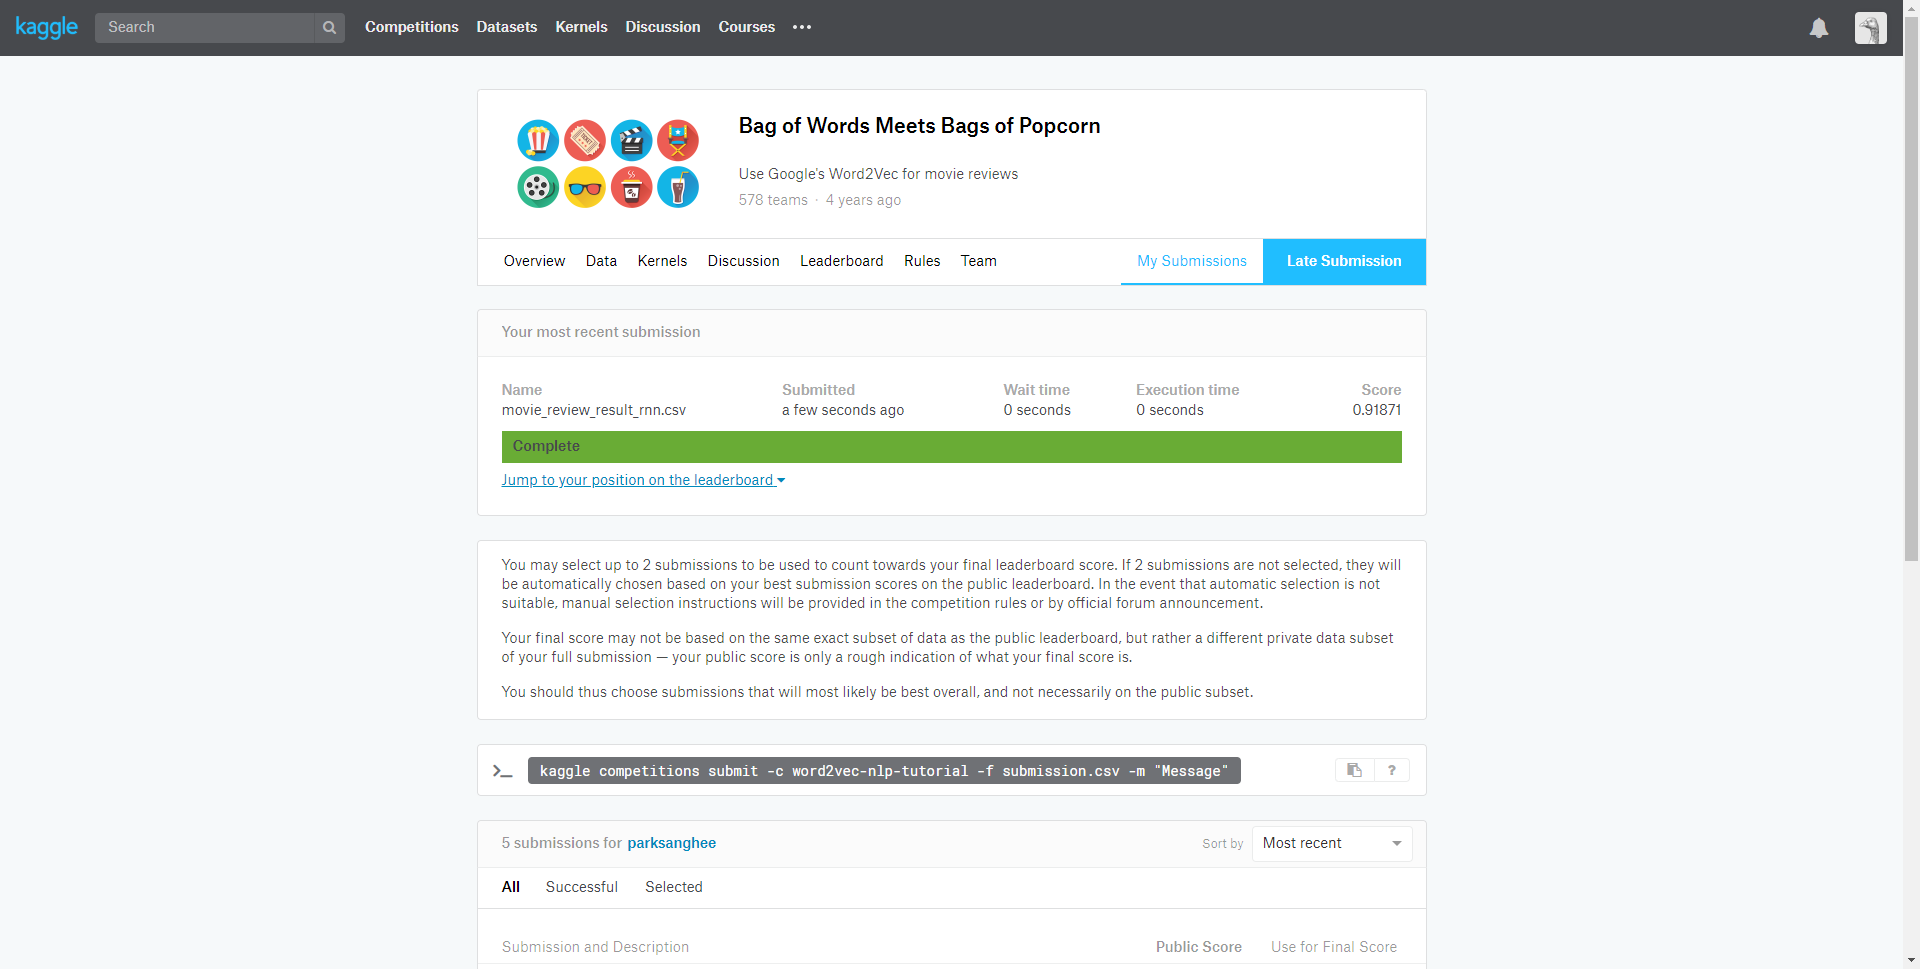

In [83]:
from IPython.display import Image
Image("Image/rnn.png")

# 컨볼루션 신경망 분류 모델 (CNN)
합성곱 신경망(CNN)은 딥러닝의 부흥을 이끈 핵심 알고리즘 모델 중 하나로써 전통적인 신경망 앞에 여러 계층의 합성곱(Convolution) 계층을 쌓은 모델인데, 입력 받은 이미지에 대한 가장 좋은 특징을 만들어 내도록 학습하고, 추출된 특징을 활용해 이미지를 분류하는 방식이다.

일반적으로 이미지에서는 이미지 파일 각각 강아지, 고양이, 돼지 등과 같이 특정 라벨을 붙여 데이터셋을 만들고, 모델이 학습을 하면서 각 특징값을 추출해서 특징을 배우고, 가장 가까운 라벨을 예측한다.

텍스트에서는 합성곱 신경망을 어떻게 활용했을까? 물론 텍스트에서도 좋은 효과를 낼 수 있다는 점을 Yoon Kim (2014) 박사가 쓴 "Convolution Neural Network for Sentence Classification"을 통해 입증했다.

RNN이 단어의 입력 순서를 중요하게 반영한다면 CNN은 문장의 지역 정보를 보존하며너서 각 문장 성분의 등장 정보를 학습에 반영하는 구조로 풀어가고 있따. 학습할 때 각 필터 크기를 조절하면서 언어의 특징 값을 추출하게 되는데, 기존의 n-gram 방식과 유사하다.

예를 들어 "나는 배가 고프다" 라는 문장을 2그램을 사용한다면 "나 는/ 는 배/ 배 가 / 가 고프 / 고프 다/" 로 각각 문장의 단어 성분을 쪼개서 활용하는 접근법을, 단어의 각 벡터값을 투영해서 컨볼루션 필터값에 적용하는 원리다.

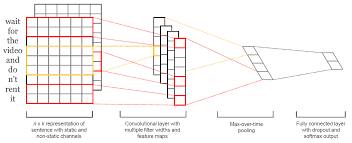

In [2]:
from IPython.display import Image
Image("Image/cnntext.png")

CNN 모델 구현은 기존에 만들어놓은 RNN에서 모델쪽 코드만 변경해서 호라용한다.

In [3]:
# 라이브러리
import sys
import os
import numpy as np
import json

from sklearn.model_selection import train_test_split
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [4]:
# 이전에 저장했던 학습에 필요한 디렉터리 설정 및 학습 / 평가 데이터를 불러온다.

DATA_IN_PATH = './data/'
DATA_OUT_PATH = './dataout/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'

DATA_CONFIGS = 'data_configs.json'

train_input_data = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_label_data = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
test_input_data = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))

with open(DATA_IN_PATH + DATA_CONFIGS, 'r') as f:
    prepro_configs = json.load(f)
    print(prepro_configs.keys())

dict_keys(['vocab', 'vocab_size'])


In [5]:
# 파라미터 변수
RNG_SEED = 1234
BATCH_SIZE = 16
NUM_EPOCHS = 3
VOCAB_SIZE = prepro_configs['vocab_size'] + 1
EMB_SIZE = 128
VALID_SPLIT = 0.2

# 데이터셋 분리
train_input, eval_input, train_label, eval_label = train_test_split(train_input_data, train_label_data, test_size=VALID_SPLIT, random_state=RNG_SEED)

In [6]:
# 전처리 학습을 위해 tf.data를 설정
def mapping_fn(X, Y=None):
    input, label = {'x': X}, Y
    return input, label

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((train_input, train_label))
    dataset = dataset.shuffle(buffer_size=len(train_input))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(mapping_fn)
    dataset = dataset.repeat(count=NUM_EPOCHS)

    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((eval_input, eval_label))
    dataset = dataset.shuffle(buffer_size=len(eval_input))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(mapping_fn)

    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

In [7]:
# 모델 함수
def model_fn(features, labels, mode):

    TRAIN = mode == tf.estimator.ModeKeys.TRAIN
    EVAL = mode == tf.estimator.ModeKeys.EVAL
    PREDICT = mode == tf.estimator.ModeKeys.PREDICT
    
    #embedding layer를 선언합니다.
    embedding_layer = keras.layers.Embedding(
                    VOCAB_SIZE,
                    EMB_SIZE)(features['x'])
    
    # embedding layer에 대한 output에 대해 dropout을 취합니다.
    dropout_emb = keras.layers.Dropout(rate=0.5)(embedding_layer)

    ## filters = 128이고 kernel_size = 3,4,5입니다.
    ## 길이가 3,4,5인 128개의 다른 필터를 생성합니다. 3,4,5 gram의 효과처럼 다양한 각도에서 문장을 보는 효과가 있습니다.
    ## conv1d는 (배치사이즈, 길이, 채널)로 입력값을 받는데, 배치사이즈: 문장 숫자 | 길이: 각 문장의 단어의 개수 | 채널: 임베딩 출력 차원수임
    
    conv1 = keras.layers.Conv1D(
         filters=128,
         kernel_size=3,
        padding='valid',
         activation=tf.nn.relu)(dropout_emb)
    
    pool1 = keras.layers.GlobalMaxPool1D()(conv1)

    conv2 = keras.layers.Conv1D(
         filters=128,
         kernel_size=4,
        padding='valid',
         activation=tf.nn.relu)(dropout_emb)
    
    pool2 = keras.layers.GlobalMaxPool1D()(conv2)
    
    conv3 = keras.layers.Conv1D(
         filters=128,
         kernel_size=5,
        padding='valid',
         activation=tf.nn.relu)(dropout_emb)
    pool3 = keras.layers.GlobalMaxPool1D()(conv3)
    
    concat = keras.layers.concatenate([pool1, pool2, pool3]) #3,4,5gram이후 모아주기
    
    hidden = keras.layers.Dense(250, activation=tf.nn.relu)(concat)
    dropout_hidden = keras.layers.Dropout(rate=0.5)(hidden)
    logits = keras.layers.Dense(1, name='logits')(dropout_hidden)
    logits = tf.squeeze(logits, axis=-1)
    
    #최종적으로 학습, 평가, 테스트의 단계로 나누어 활용
    
    if PREDICT:
        return tf.estimator.EstimatorSpec(
            mode=mode,
            predictions={
                'prob': tf.nn.sigmoid(logits)
            }
        )
        
    loss = tf.losses.sigmoid_cross_entropy(labels, logits)

    if EVAL:
        pred = tf.nn.sigmoid(logits)
        accuracy = tf.metrics.accuracy(labels, tf.round(pred))
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops={'acc': accuracy})
        
    if TRAIN:
        global_step = tf.train.get_global_step()
        train_op = tf.train.AdamOptimizer(0.001).minimize(loss, global_step)

        return tf.estimator.EstimatorSpec(mode=mode, train_op=train_op, loss = loss)

In [8]:
# 구현한 모델 함수를 적용한 에스티메이터 객체 생성
model_dir = os.path.join(os.getcwd(), "data_out/checkpoint/cnn/")
os.makedirs(model_dir, exist_ok=True)

config_tf = tf.estimator.RunConfig(save_checkpoints_steps=200, keep_checkpoint_max=2, log_step_count_steps=400)

 #에스티메이터 객체 생성
cnn_est = tf.estimator.Estimator(model_fn, model_dir=model_dir, config=config_tf)
cnn_est.train(train_input_fn) #학습하기
cnn_est.evaluate(eval_input_fn) #평가하기

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\user\\Desktop\\NLP\\02. NLP_with_Tensorflow\\data_out/checkpoint/cnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 200, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 2, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 400, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A9AF07828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaver

{'acc': 0.8676, 'loss': 0.5626119, 'global_step': 3750}

In [9]:
# 테스트 데이터 예측하기
test_input_data = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb')) 
ids = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'))
predict_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x":test_input_data}, shuffle=False)
predictions = np.array([p['prob'] for p in cnn_est.predict(input_fn=predict_input_fn)])

# 제출 결과 저장
output = pd.DataFrame( data={"id": ids, "sentiment": predictions} )
output.to_csv( DATA_OUT_PATH + "Bag_of_Words_model_test.csv", index=False, quoting=3 )

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\user\Desktop\NLP\02. NLP_with_Tensorflow\data_out/checkpoint/cnn/model.ckpt-3750
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


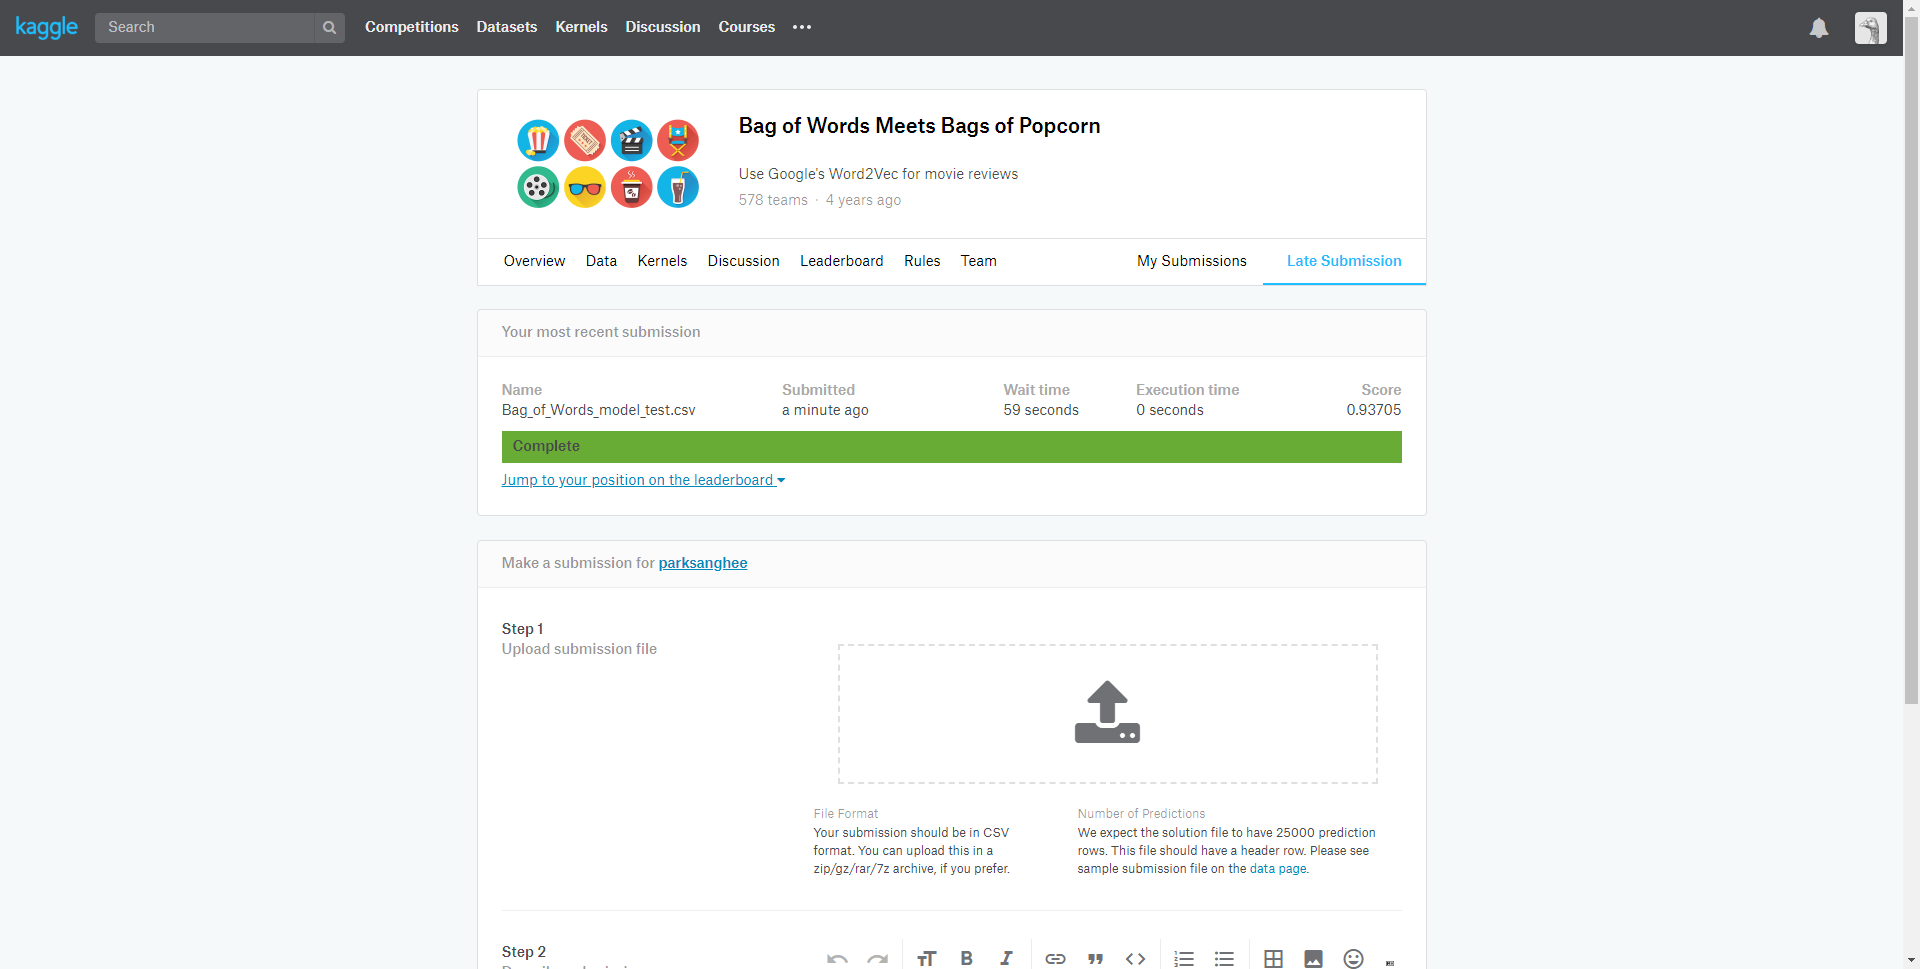

In [10]:
from IPython.display import Image
Image("Image/cnnresult.png")

### 로지스틱 회귀 모델 : 0.87400
### 랜덤 포레스트 : 0.84760
### 순환 신경망(RNN) : 0.91871
### 합성곱 신경망(CNN) : 0.93705

결과를 보면 앞선 머신러닝 모델보다 딥러닝 모델의 성능이 월등히 높다. 학습 시간이 매우 길고 구현이 어렵다는 점이 머신러닝 모델과 비교해서 단점이지만 성능 자체만 볼 때는 매우 우수한 모델이다. 하지만 항상 이렇게 딥러닝 모델이 좋은 성과를 내는 것은 아니다. 기본적으로 데이터의 수가 일정 이상 되는 경우에 보통 딥러닝 모델의 성과가 좋다고 알려져 있다.